### Imports

In [1]:
import numpy as np
import pandas as pd
import time
import os
import aux_tools as aux
import Tabesh2013functions as tbsh
from collections import defaultdict
import mine_tools as mt
import numpy.matlib as matlib

In [ ]:
Mina_df = pd.read_csv('Modelo3_Ben_arreglado.csv', sep=";")
Mina_df['id'] = Mina_df.index + 1
combinaciones = (
    Mina_df[['fase', 'z']]
    .drop_duplicates()
    .sort_values(['fase', 'z'], ascending=[True, False])
)

# Asignar número de banco por grupo de fase
combinaciones['banco'] = (
    combinaciones.groupby('fase').cumcount() + 1
)

# Unir esta info de vuelta al df original
Mina_df = Mina_df.merge(combinaciones, on=['fase', 'z'], how='left')

Mina_df.head()

x        y       z  fase  Densidad  cut  Cus   Ag   As   Zn     ton  id  \
0  7915  24717.5  2392.5     9      2.41  0.0  0.0  0.0  0.0  0.0  5422.5   1   
1  7925  24387.5  2362.5     5      2.41  0.0  0.0  0.0  0.0  0.0  5422.5   2   
2  7925  24402.5  2362.5     5      2.41  0.0  0.0  0.0  0.0  0.0  5422.5   3   
3  7925  24417.5  2362.5     5      2.41  0.0  0.0  0.0  0.0  0.0  5422.5   4   
4  7925  24432.5  2362.5     5      2.41  0.0  0.0  0.0  0.0  0.0  5422.5   5   

   banco  
0      3  
1      3  
2      3  
3      3  
4      3

Los 'cut' parecieran no estar divididos en 100

Celda para la mina CP_fases

In [2]:
mina_df = pd.read_csv('CP_fases.txt', sep="\s+")
mina_df.rename(columns={'0': 'id'}, inplace=True)

combinaciones = (
    mina_df[['fase', 'z']]
    .drop_duplicates()
    .sort_values(['fase', 'z'], ascending=[True, False])
)

# Asignar número de banco por grupo de fase
combinaciones['banco'] = (
    combinaciones.groupby('fase').cumcount() + 1
)

# Unir esta info de vuelta al df original
mina_df = mina_df.merge(combinaciones, on=['fase', 'z'], how='left')

mina_df.head()

x          y       z        au       cpy      cueq       cus  \
0  491425.0  7456205.0  1968.0  0.288929  1.124707  0.712658  0.022003   
1  491435.0  7456195.0  1968.0  0.266522  1.057851  0.640223  0.021141   
2  491445.0  7456195.0  1968.0  0.243283  2.427782  0.531022  0.019991   
3  491455.0  7456195.0  1968.0  0.243283  2.427782  0.531022  0.019991   
4  491435.0  7456205.0  1968.0  0.288929  1.124707  0.712658  0.022003   

        cut   density  material        py    recg_au    recg_cu     tasox  \
0  0.550661  2.615598         8  0.401511  69.001505  87.011938  0.039957   
1  0.491924  2.626056         8  0.197908  68.839492  87.471598  0.042976   
2  0.396348  2.637350         6  0.399009  68.633711  87.659524  0.050438   
3  0.396348  2.637350         6  0.399009  68.633711  87.659524  0.050438   
4  0.550661  2.615598         8  0.401511  69.001505  87.011938  0.039957   

   tipomineral  fase  id  banco  
0            2     4   1     22  
1            2     4   2     22  
2            2     4   3     22  
3            2     4   4     22  
4            2     4   5     22

### Ciclo de Clustering + ShapeRefinement

Primero, necesitamos calcular las precedencias de fase banco

Para la mina grande:

Para la mina mediana:

In [3]:
df = mina_df.copy()
R = 0.9
P = 4
cm = 2
cp = 10
cr = 0.25
alpha_ley_corte = 0
FTL = 2204.62
ley_marginal = cp/((P-cr)*FTL*R)
ley_critica = (cp+cm)/((P-cr)*FTL*R)

ley_corte = ((1-alpha_ley_corte)*ley_marginal + alpha_ley_corte*(ley_critica))*100
df['destino'] = [1 if df.iloc[i]['cut']>= ley_corte else 0 for i in range(len(df))]
clusterizado = aux.mine_clustering_parallel(df)

KeyboardInterrupt: 

In [10]:
clusterizado

x          y       z        au        cpy      cueq       cus  \
0      491395.0  7456355.0  2112.0  0.222576  97.588448  0.488656  0.018999   
1      491425.0  7456355.0  2096.0  0.050000  97.623054  0.100000  0.050000   
2      491425.0  7456335.0  2112.0  0.142517  96.636360  0.401651  0.013997   
3      491405.0  7456345.0  2112.0  0.166058  99.105438  0.406444  0.013825   
4      491415.0  7456345.0  2112.0  0.121316  98.757927  0.346658  0.015604   
...         ...        ...     ...       ...        ...       ...       ...   
91277  491605.0  7456935.0  2288.0  0.010276   0.105612  0.036566  0.011695   
91278  491615.0  7456935.0  2288.0  0.010276   0.105612  0.036566  0.011695   
91279  491625.0  7456935.0  2288.0  0.013083   0.112956  0.039108  0.011483   
91280  491635.0  7456935.0  2288.0  0.013083   0.112956  0.039108  0.011483   
91281  491645.0  7456935.0  2288.0  0.013362   0.105663  0.036583  0.009423   

            cut   density  material   py    recg_au    recg_cu     tasox  \
0      0.364357  1.800000         6  2.0  68.299970  86.469868  0.052144   
1      0.100000  1.800000         1  2.0   0.000000   0.000000  0.031757   
2      0.317545  1.800000         6  2.0  67.675404  81.077441  0.044079   
3      0.306877  1.800000         6  2.0  67.853002  80.010394  0.045049   
4      0.274275  1.800000         5  2.0  67.499935  79.986670  0.056893   
...         ...       ...       ...  ...        ...        ...       ...   
91277  0.036566  2.406898         0  0.0   0.000000   0.000000  0.319846   
91278  0.036566  2.406898         0  0.0   0.000000   0.000000  0.319846   
91279  0.039108  2.161777         0  0.0   0.000000   0.000000  0.293619   
91280  0.039108  2.161777         0  0.0   0.000000   0.000000  0.293619   
91281  0.036583  2.265523         0  0.0   0.000000   0.000000  0.257580   

       tipomineral  fase     id  banco  destino  cluster  
0                2     1  14802     13        1        1  
1                0     1  14820     14        0        1  
2                2     1  14823     13        1        1  
3                2     1  14824     13        1        1  
4                2     1  14825     13        1        1  
...            ...   ...    ...    ...      ...      ...  
91277            0     4  90811      2        0       40  
91278            0     4  90812      2        0       40  
91279            0     4  90813      2        0       40  
91280            0     4  90814      2        0       39  
91281            0     4  90815      2        0       39  

[91282 rows x 20 columns]

In [4]:
df = mina_df.copy()
res = aux.Precedencia_Fase_Banco(df)
precedence_tree = defaultdict(list)
for node, predecessor in res:
    precedence_tree[node].append(predecessor)

In [5]:
np.sort(df['fase'].unique())

array([1, 2, 3, 4])

In [7]:
df

x          y       z        au       cpy      cueq       cus  \
0      491425.0  7456205.0  1968.0  0.288929  1.124707  0.712658  0.022003   
1      491435.0  7456195.0  1968.0  0.266522  1.057851  0.640223  0.021141   
2      491445.0  7456195.0  1968.0  0.243283  2.427782  0.531022  0.019991   
3      491455.0  7456195.0  1968.0  0.243283  2.427782  0.531022  0.019991   
4      491435.0  7456205.0  1968.0  0.288929  1.124707  0.712658  0.022003   
...         ...        ...     ...       ...       ...       ...       ...   
91277  491985.0  7456545.0  2320.0  0.010000  0.043324  0.015000  0.001000   
91278  491975.0  7456555.0  2320.0  0.010000  0.043324  0.015000  0.001000   
91279  491985.0  7456555.0  2320.0  0.010000  0.043324  0.015000  0.001000   
91280  491975.0  7456565.0  2320.0  0.017194  0.112734  0.039031  0.006303   
91281  491975.0  7456575.0  2320.0  0.017194  0.112734  0.039031  0.006303   

            cut   density  material        py    recg_au    recg_cu     tasox  \
0      0.550661  2.615598         8  0.401511  69.001505  87.011938  0.039957   
1      0.491924  2.626056         8  0.197908  68.839492  87.471598  0.042976   
2      0.396348  2.637350         6  0.399009  68.633711  87.659524  0.050438   
3      0.396348  2.637350         6  0.399009  68.633711  87.659524  0.050438   
4      0.550661  2.615598         8  0.401511  69.001505  87.011938  0.039957   
...         ...       ...       ...       ...        ...        ...       ...   
91277  0.015000  2.352000         0  0.000000   0.000000   0.000000  0.066667   
91278  0.015000  2.352000         0  0.000000   0.000000   0.000000  0.066667   
91279  0.015000  2.352000         0  0.000000   0.000000   0.000000  0.066667   
91280  0.039031  2.352000         0  0.000000   0.000000   0.000000  0.161474   
91281  0.039031  2.352000         0  0.000000   0.000000   0.000000  0.161474   

       tipomineral  fase     id  banco  
0                2     4      1     22  
1                2     4      2     22  
2                2     4      3     22  
3                2     4      4     22  
4                2     4      5     22  
...            ...   ...    ...    ...  
91277            0     3  91278      2  
91278            0     3  91279      2  
91279            0     3  91280      2  
91280            0     3  91281      2  
91281            0     3  91282      2  

[91282 rows x 18 columns]

In [8]:
R = 0.9
P = 4
cm = 2
cp = 10
cr = 0.25
alpha_ley_corte = 0
FTL = 2204.62
ley_marginal = cp/((P-cr)*FTL*R)
ley_critica = (cp+cm)/((P-cr)*FTL*R)

ley_corte = ((1-alpha_ley_corte)*ley_marginal + alpha_ley_corte*(ley_critica))*100
df['destino'] = [1 if df.iloc[i]['cut']>= ley_corte else 0 for i in range(len(df))]

In [5]:
BlockWidth = 10
BlockHeight = 10
max_cluster_size = 30
Min_Cluster_Length = 6
Iterations_PostProcessing = 30
c_coef = 0.1
wd = 1.5
wg = 2
r = 0.01

In [13]:
df = df[df['fase']==1]
df = df[(df['banco']==8)|(df['banco']==9)]
res = aux.Precedencia_Fase_Banco(df)
precedence_tree = defaultdict(list)
for node, predecessor in res:
    precedence_tree[node].append(predecessor)

In [ ]:
def Calculate_Arcs(df_sup, df_inf, BlockWidth=10, BlockHeight=10, arcs=defaultdict(list)):
    '''
    Asume que el df_inf corresponde a la fase banco inferior a df_sup, calcula los arcos de precedencia verticales
    '''
    A_clusters = Calculate_Vertical_Adyacency_Matrix(df_sup, df_inf, BlockWidth=BlockWidth, BlockHeight=BlockHeight)
    f_inf = df_inf['fase'][0]
    b_inf = df_inf['banco'][0]
    f_sup = df_sup['fase'][0]
    b_sup = df_sup['banco'][0]
    for i in range(A_clusters.shape[1]):  # i: índice de clusters inferiores
        for j in range(A_clusters.shape[0]):  # j: índice de clusters superiores
            if A_clusters.T[i][j] == 1:
                arcs[(int(f_inf), int(b_inf), i + 1)].append((int(f_sup), int(b_sup), j + 1))

    return arcs

def Precedencia_Fase_Banco(df):
    df = df.copy()
    # Obtener los valores únicos ordenados de 'z'
    sorted_unique_z = np.sort(df['z'].unique())

    # Crear una nueva columna 'nivel' basada en la posición de 'z' en el array ordenado
    df['nivel'] = df['z'].apply(lambda x: np.where(sorted_unique_z == x)[0][0])
    info_fb = {}
    fases_a_procesar = np.sort(df['fase'].unique())
    for f in fases_a_procesar:
        benches = np.sort(df[df['fase']==f]['banco'].unique())
        for b in benches:
            df_inf = df[(df['fase']==f)&(df['banco']==b)]
            df_inf.reset_index(drop=True, inplace=True)
            z_level = df_inf['nivel'][0]
            min_x = df_inf['x'].min()
            max_x = df_inf['x'].max()
            min_y = df_inf['y'].min()
            max_y = df_inf['y'].max()
            info_fb[(int(f),int(b))] = (z_level, min_x, max_x, min_y,max_y)

    # Lista para guardar los pares (f_i, b_i) y (f_j, b_j) que cumplen la condición
    resultados = []

    # Iterar sobre todos los pares (f1, b1) y (f2, b2)
    for (f1, b1), (z1, min_x1, max_x1, min_y1, max_y1) in info_fb.items():
        for (f2, b2), (z2, min_x2, max_x2, min_y2, max_y2) in info_fb.items():
            # Condición 1: z1 == z2+1 (es necesario que )
            if z1 == z2+1:
                # Condición 2: Los cuadros delimitados por (x, y) se intersectan
                if (min_x1 <= max_x2 and max_x1 >= min_x2) and (min_y1 <= max_y2 and max_y1 >= min_y2):
                    resultados.append(((f1, b1), (f2, b2)))
    return resultados
def Global_Vertical_Arc_Calculation(df):
    resultados = Precedencia_Fase_Banco(df)
    arcs = defaultdict(list)
    # Iterar
    for par in resultados:
        ((f_sup,b_sup),(f_inf,b_inf)) = par
        df_inf = df[(df['fase']==f_inf)&(df['banco']==b_inf)].copy()
        df_inf.reset_index(drop=True, inplace=True)
        df_sup = df[(df['fase']==f_sup)&(df['banco']==b_sup)].copy()
        df_sup.reset_index(drop=True, inplace=True)
        arcs = Calculate_Arcs(df_sup,df_inf,arcs=arcs)
    return arcs

def Calculate_Vertical_Adyacency_Matrix(df_sup, df_inf, BlockWidth=10, BlockHeight=10, arcs=defaultdict(list), cluster_col='cluster'):
    '''
    Asume que el df_inf corresponde a la fase banco inferior a df_sup, calcula los arcos de precedencia verticales
    '''
    x1 = df_sup['x'].values
    y1 = df_sup['y'].values
    x2 = df_inf['x'].values
    y2 = df_inf['y'].values

    X1 = matlib.repmat(x1.reshape(len(x1), 1), 1, len(x2))  # (n_sup, n_inf)
    X2 = matlib.repmat(x2.reshape(1, len(x2)), len(x1), 1)  # (n_sup, n_inf)

    Y1 = matlib.repmat(y1.reshape(len(y1), 1), 1, len(y2))  # (n_sup, n_inf)
    Y2 = matlib.repmat(y2.reshape(1, len(y2)), len(y1), 1)  # (n_sup, n_inf)


    Dx = np.abs((1/BlockWidth)*(X1 - X2))
    Dy = np.abs((1/BlockHeight)*(Y1 - Y2))
    adjency_matrix = (np.sqrt(Dx**2 + Dy**2)<=1) # Distancia euclidiana normalizada
    # adjency_matrix = (Dx <= 1) & (Dy <= 1) # Mide la adyacencia por direcciones X e Y, usando 1, dos bloques son adyacentes si están a una distancia de 1 bloque o menos

    # adjency_matrix = (D <= BlockWidth) & (D > 0)
    adjency_matrix = sp.sparse.csr_matrix(adjency_matrix).astype(int)

    # Obtener clusters únicos y sus índices
    clusters_sup = df_sup[cluster_col].unique()
    clusters_inf = df_inf[cluster_col].unique()

    cluster_sup_to_idx = {c: i for i, c in enumerate(clusters_sup)}
    cluster_inf_to_idx = {c: i for i, c in enumerate(clusters_inf)}

    n_sup = len(clusters_sup)
    n_inf = len(clusters_inf)

    # Inicializar matriz de adyacencia entre clusters
    A_clusters = np.zeros((n_sup, n_inf), dtype=int)

    # Recorrer los pares adyacentes entre bloques
    rows, cols = adjency_matrix.nonzero()  # A_block: sup x inf
    for i_sup, i_inf in zip(rows, cols):
        c_sup = df_sup.iloc[i_sup][cluster_col]
        c_inf = df_inf.iloc[i_inf][cluster_col]

        idx_sup = cluster_sup_to_idx[c_sup]
        idx_inf = cluster_inf_to_idx[c_inf]

        A_clusters[idx_sup, idx_inf] = 1


    return A_clusters

'''
Metodo de clustering de toda una mina, con opciones para armar la matriz de similaridad, usar shape refinement, etc.
'''
def mine_clustering(df, BlockWidth = 10, BlockHeight = 10, params=dict()):
    params.setdefault('penalizacion_c', 0.5)
    c_coef = params['penalizacion_c']
    df['cluster'] = -1
    sorted_unique_z = np.sort(df['z'].unique()) #Orden ascendente de z
    
    res = aux.Precedencia_Fase_Banco(df)
    precedence_tree = defaultdict(list)
    for node, predecessor in res:
        precedence_tree[node].append(predecessor)

    for z in sorted_unique_z:
        print(f"---Procesando Z={z}")
        sliced_df = df[df['z']==z]
        lista_fases_bancos = list((sliced_df[['fase', 'banco']].drop_duplicates()).itertuples(index=False, name=None)) # Lista de tuplas únicas de (fase, banco) en z
        for (f,b) in lista_fases_bancos:
            print(f"========Procesando Fase {f} - Banco {b}========")
            slice_fase_banco = sliced_df[(sliced_df['fase']==f) & (sliced_df['banco']==b)]
            A = mt.Calculate_Adjency_Matrix(slice_fase_banco, BlockWidthX=BlockWidth, BlockWidthY=BlockHeight)
            S = mt.Calculate_Similarity_Matrix(slice_fase_banco, params=params)
            if (f,b) not in precedence_tree: # Si no hay precedencias verticales
                print(f"---No hay precedencias verticales")
                fase_banco_clusterizado = mt.Clustering_Tabesh(slice_fase_banco, A, S, params=params)[0]
                df.loc[fase_banco_clusterizado.index, 'cluster'] = fase_banco_clusterizado['cluster'] # Asignar clusters al df original

            if (f,b) in precedence_tree: # Si hay precedencias verticales
                print(f"---Precedencias Detectadas")
                print(precedence_tree[(f,b)])
                dfs = [] # Lista para almacenar los dataframes precedentes
                for (f_,b_) in precedence_tree[(f,b)]:
                    dfs.append( (df[(df['fase']==f_)&(df['banco']==b_)]).copy() )
                offset=0
                for df_ in dfs:
                    if not df_.empty:
                        # Ajustamos los clusters
                        df_['cluster'] = df_['cluster'] + offset
                        # Actualizamos el offset: suma el máximo cluster de este df
                        offset = df_['cluster'].max()
                
                df_inf = pd.concat(dfs, ignore_index=True) #dataframe inferior a f,b
                df_sup = slice_fase_banco.copy()
                df_sup.reset_index(drop=True, inplace=True)
                df_sup['cluster'] = df_sup['id']
                A_vertical = aux.Calculate_Vertical_Adyacency_Matrix(df_sup,df_inf, BlockWidth=BlockWidth/4, BlockHeight=BlockHeight/4) # Tiene que ser estricto pues es para calcular C
                # Ahora calculamos la matriz C
                C = A_vertical@A_vertical.T
                C = (1-C)*c_coef+C
                #Ahora la similaridad
                S = S*C
                print(f"---Clustering de Fase {f} - Banco {b}")
                fase_banco_clusterizado = mt.Clustering_Tabesh(slice_fase_banco, A, S, params=params)[0]
                df.loc[fase_banco_clusterizado.index, 'cluster'] = fase_banco_clusterizado['cluster'] # Asignar clusters al df original


In [10]:
mine_clustering(df, BlockWidth=BlockWidth, BlockHeight=BlockHeight, params=dict(penalizacion_c=c_coef))

---Procesando Z=1952.0
========Procesando Fase 4 - Banco 23========
---No hay precedencias verticales
========PreProcessing Results========
Tamaño Fase-Banco: 393
Clusters objetivo: 13
Clusters eliminados: 378
Total de clusters: 15
Tiempo: 7.429656028747559
---Procesando Z=1968.0
========Procesando Fase 4 - Banco 22========
---Precedencias Detectadas
[(4, 23)]
---Clustering de Fase 4 - Banco 22
========PreProcessing Results========
Tamaño Fase-Banco: 706
Clusters objetivo: 23
Clusters eliminados: 679
Total de clusters: 27
Tiempo: 20.66875982284546
---Procesando Z=1984.0
========Procesando Fase 4 - Banco 21========
---Precedencias Detectadas
[(4, 22)]
---Clustering de Fase 4 - Banco 21
========PreProcessing Results========
Tamaño Fase-Banco: 768
Clusters objetivo: 25
Clusters eliminados: 739
Total de clusters: 29
Tiempo: 27.303743600845337
========Procesando Fase 3 - Banco 23========
---Precedencias Detectadas
[(4, 22)]
---Clustering de Fase 3 - Banco 23
========PreProcessing Results===

In [11]:
df.to_csv("mina_clusterizada_2011.csv", index=False)

In [ ]:
# Lista para guardar resultados
df = clusterizado
metricas = []
# Suponemos que las fases son 1 a 4 (puedes adaptar según tu df)
for i in df['fase'].unique():
   for j in df[df['fase']==i]['banco'].unique():
        df_fase = df[(df['fase']==i)&(df['banco']==j)]
        # Calcular CV usando tu función
        cv = mt.Coefficient_Variation(df_fase)[0]
        ru = mt.Rock_Unity(df_fase)[0]
        ddf = mt.Destination_Dilution_Factor(df_fase)[0]
        # Agregar fila con placeholders para RU y DDF
        metricas.append({
            'fase': i,
            'banco':j,
            'RU': ru,       # Placeholder
            'CV': cv,
            'DDF': ddf       # Placeholder
        })

# Crear DataFrame final
metricas = pd.DataFrame(metricas)
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

sns.boxplot(data=metricas, x='fase', y='RU', ax=axes[0])
axes[0].set_title('Distribución de RU por fase')
axes[0].set_ylabel('RU')

sns.boxplot(data=metricas, x='fase', y='DDF', ax=axes[1])
axes[1].set_title('Distribución de DDF por fase')
axes[1].set_ylabel('DDF')

sns.boxplot(data=metricas, x='fase', y='CV', ax=axes[2])
axes[2].set_title('Distribución de CV por fase')
axes[2].set_xlabel('Fase')
axes[2].set_ylabel('CV')    

plt.tight_layout()
plt.suptitle('Distribuciones de RU, DDF y CV por fase', fontsize=16, y=1.02)

plt.savefig("grafico.png", dpi=300)

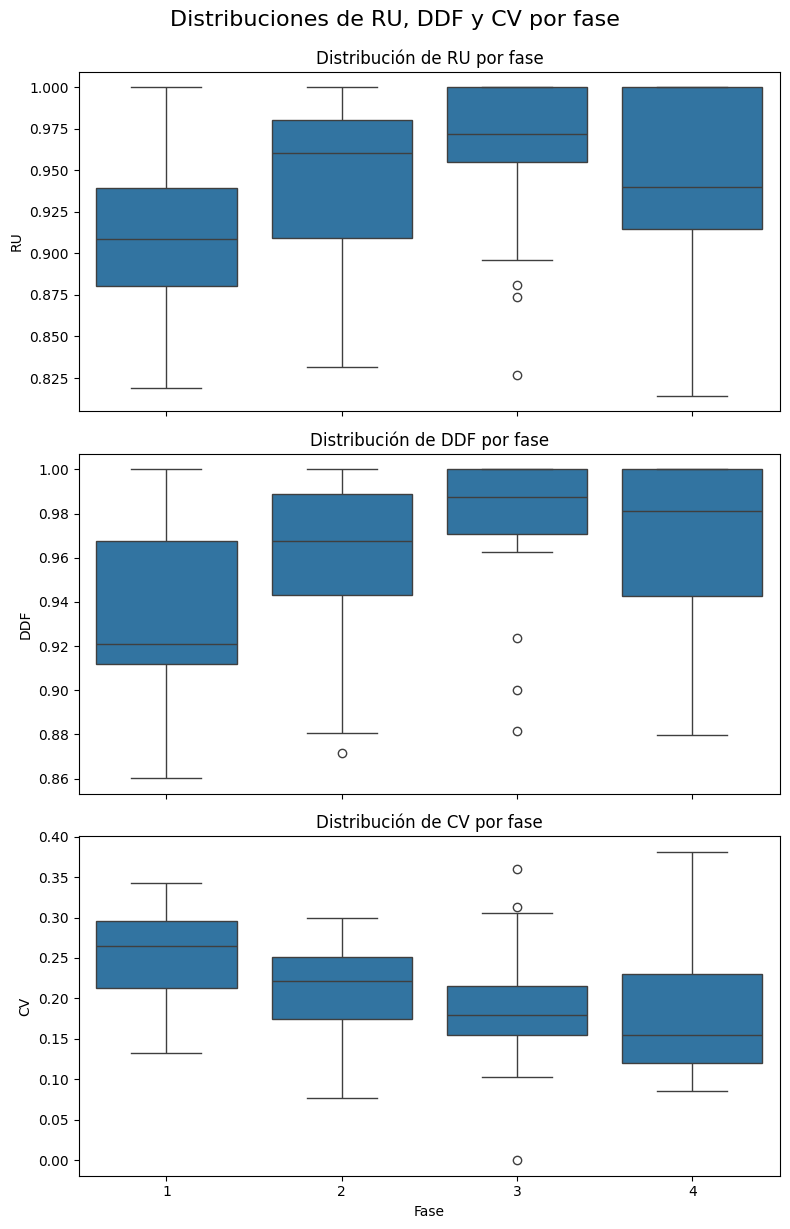

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

sns.boxplot(data=metricas, x='fase', y='RU', ax=axes[0])
axes[0].set_title('Distribución de RU por fase')
axes[0].set_ylabel('RU')

sns.boxplot(data=metricas, x='fase', y='DDF', ax=axes[1])
axes[1].set_title('Distribución de DDF por fase')
axes[1].set_ylabel('DDF')

sns.boxplot(data=metricas, x='fase', y='CV', ax=axes[2])
axes[2].set_title('Distribución de CV por fase')
axes[2].set_xlabel('Fase')
axes[2].set_ylabel('CV')    

plt.tight_layout()
plt.suptitle('Distribuciones de RU, DDF y CV por fase', fontsize=16, y=1.02)

plt.savefig("grafico.png", dpi=300)

In [21]:
df['cluster'] = -1
params_S = {}
params_Clustering = {'Average_Length_Cluster':70, 'Max_Length_Cluster':100}
sorted_unique_z = np.sort(df['z'].unique()) #Orden ascendente de z
first = True # Variable para saber si es la primera iteración
for z in sorted_unique_z:
    print(f"---Procesando Z={z}")
    sliced_df = df[df['z']==z]
    lista_fases_bancos = list((sliced_df[['fase', 'banco']].drop_duplicates()).itertuples(index=False, name=None)) # Lista de tuplas únicas de (fase, banco) en z
    # Ahora, si es el primer z, clusterizamos sin C_ij
    if first:
        first = False
        for (f,b) in lista_fases_bancos:
            print(f"========Procesando Fase {f} - Banco {b}========")
            slice_fase_banco = sliced_df[(sliced_df['fase']==f) & (sliced_df['banco']==b)]
            A = mt.Calculate_Adjency_Matrix(slice_fase_banco, BlockWidth=BlockWidth, BlockHeight=BlockHeight)
            # S = aux.Calculate_Similarity_Matrix(slice_fase_banco)
            S = mt.Calculate_Similarity_Matrix(slice_fase_banco, params=params_S)
            fase_banco_clusterizado = mt.Clustering_Tabesh(slice_fase_banco, A, S, params=params_Clustering)[0]
            df.loc[fase_banco_clusterizado.index, 'cluster'] = fase_banco_clusterizado['cluster'] # Asignar clusters al df original
    # Sino, hay que verificar si hay precedencias verticales
    else:
        for (f,b) in lista_fases_bancos:
            print(f"========Procesando Fase {f} - Banco {b}========")
            slice_fase_banco = sliced_df[(sliced_df['fase']==f) & (sliced_df['banco']==b)]
            if (f,b) in precedence_tree:
                print(f"---Precedencias Detectadas")
                print(precedence_tree[(f,b)])
                dfs = [] # Lista para almacenar los dataframes precedentes
                for (f_,b_) in precedence_tree[(f,b)]:
                    dfs.append( (df[(df['fase']==f_)&(df['banco']==b_)]).copy() )
                offset=0
                for df_ in dfs:
                    if not df_.empty:
                        # Ajustamos los clusters
                        df_['cluster'] = df_['cluster'] + offset
                        
                        # Actualizamos el offset: suma el máximo cluster de este df
                        offset = df_['cluster'].max()

                
                df_inf = pd.concat(dfs, ignore_index=True) #dataframe inferior a f,b
                df_sup = slice_fase_banco.copy()
                df_sup.reset_index(drop=True, inplace=True)
                df_sup['cluster'] = df_sup['id']
                A = aux.Calculate_Vertical_Adyacency_Matrix(df_sup,df_inf, BlockWidth=BlockWidth/4, BlockHeight=BlockHeight/4) # Tiene que ser estricto pues es para calcular C
                # Ahora calculamos la matriz C
                C = A@A.T
                C = (1-C)*c_coef+C
                # S = aux.Calculate_Similarity_Matrix(df_sup)
                S = mt.Calculate_Similarity_Matrix(df_sup, params=params_S)
                #Ahora la similaridad
                S = S*C
                A = mt.Calculate_Adjency_Matrix(df_sup, BlockWidth=BlockWidth, BlockHeight=BlockHeight)
                print(f"---Clustering de Fase {f} - Banco {b}")
                fase_banco_clusterizado = mt.Clustering_Tabesh(slice_fase_banco, A, S, params=params_Clustering)[0]
                df.loc[fase_banco_clusterizado.index, 'cluster'] = fase_banco_clusterizado['cluster'] # Asignar clusters al df original
            else: # No hay precedencias verticales
                A = mt.Calculate_Adjency_Matrix(slice_fase_banco, BlockWidth=BlockWidth, BlockHeight=BlockHeight)
                S = mt.Calculate_Similarity_Matrix(slice_fase_banco, params=params_S)
                fase_banco_clusterizado = mt.Clustering_Tabesh(slice_fase_banco, A, S, params=params_Clustering)[0]
                df.loc[fase_banco_clusterizado.index, 'cluster'] = fase_banco_clusterizado['cluster'] # Asignar clusters al df original


---Procesando Z=2176.0
========Procesando Fase 1 - Banco 9========
========PreProcessing Results========
Tamaño Fase-Banco: 1092
Clusters objetivo: 15
Clusters eliminados: 1076
Total de clusters: 16
Tiempo: 60.47136902809143
---Procesando Z=2192.0
========Procesando Fase 1 - Banco 8========
---Precedencias Detectadas
[(1, 9)]
---Clustering de Fase 1 - Banco 8
========PreProcessing Results========
Tamaño Fase-Banco: 1334
Clusters objetivo: 19
Clusters eliminados: 1315
Total de clusters: 19
Tiempo: 81.8829824924469


Tratando 'cluster' como Continua.
  Escala de color: min=1.00, max=27.00
Tratando 'cluster' como Categórica (15 valores únicos).
Tratando 'cluster' como Continua.
  Escala de color: min=1.00, max=32.00
Tratando 'cluster' como Continua.
  Escala de color: min=1.00, max=33.00
Tratando 'cluster' como Continua.
  Escala de color: min=1.00, max=29.00
Tratando 'cluster' como Continua.
  Escala de color: min=1.00, max=41.00
Tratando 'cluster' como Continua.
  Escala de color: min=1.00, max=34.00
Tratando 'cluster' como Continua.
  Escala de color: min=1.00, max=32.00
Tratando 'cluster' como Continua.
  Escala de color: min=1.00, max=44.00
Tratando 'cluster' como Continua.
  Escala de color: min=1.00, max=45.00
Tratando 'cluster' como Continua.
  Escala de color: min=1.00, max=48.00
Tratando 'cluster' como Continua.
  Escala de color: min=1.00, max=51.00
Tratando 'cluster' como Continua.
  Escala de color: min=1.00, max=55.00
Tratando 'cluster' como Continua.
  Escala de color: min=1.00, max=5

/home/ignacio/Laboratorio-2/aux_tools.py:137: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize, dpi=dpi)


Tratando 'cluster' como Continua.
  Escala de color: min=1.00, max=102.00
Tratando 'cluster' como Continua.
  Escala de color: min=1.00, max=96.00
Tratando 'cluster' como Continua.
  Escala de color: min=1.00, max=39.00


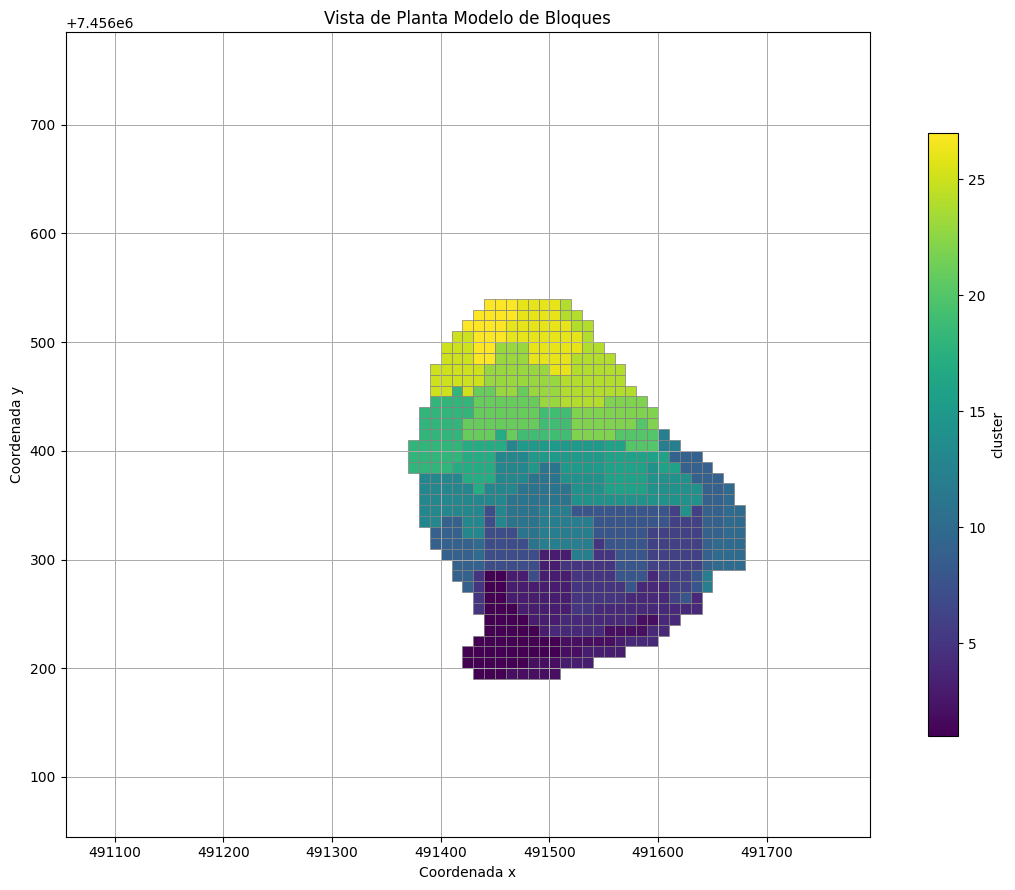

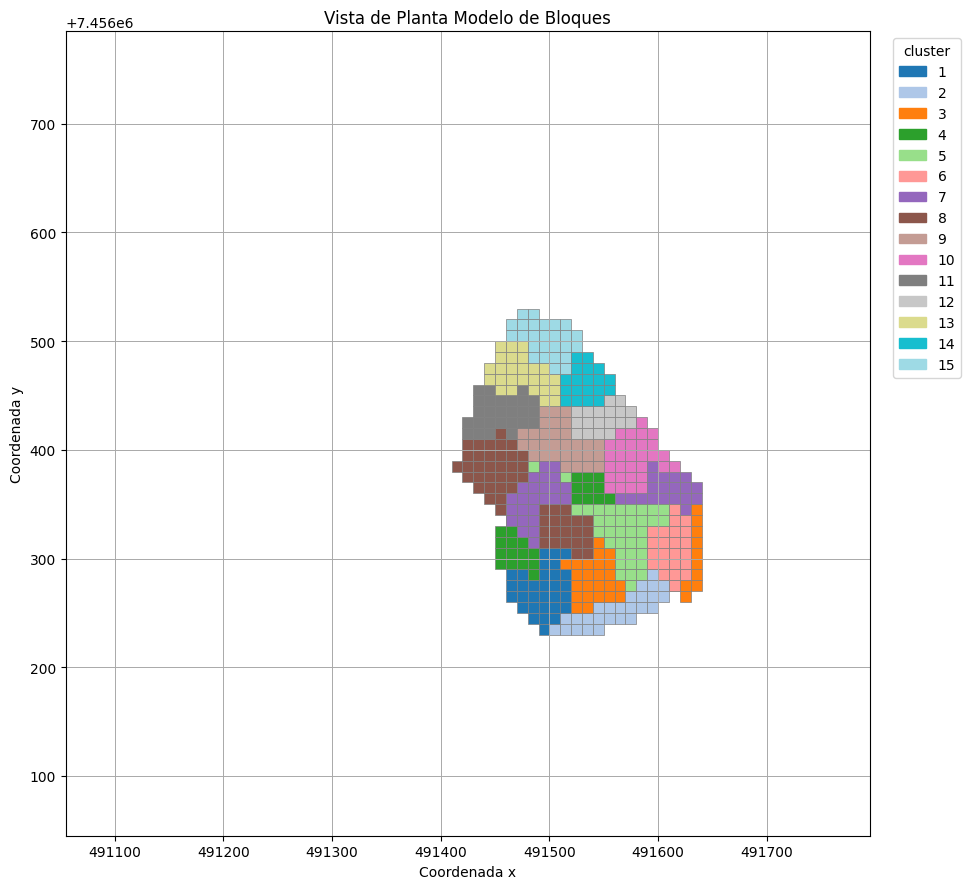

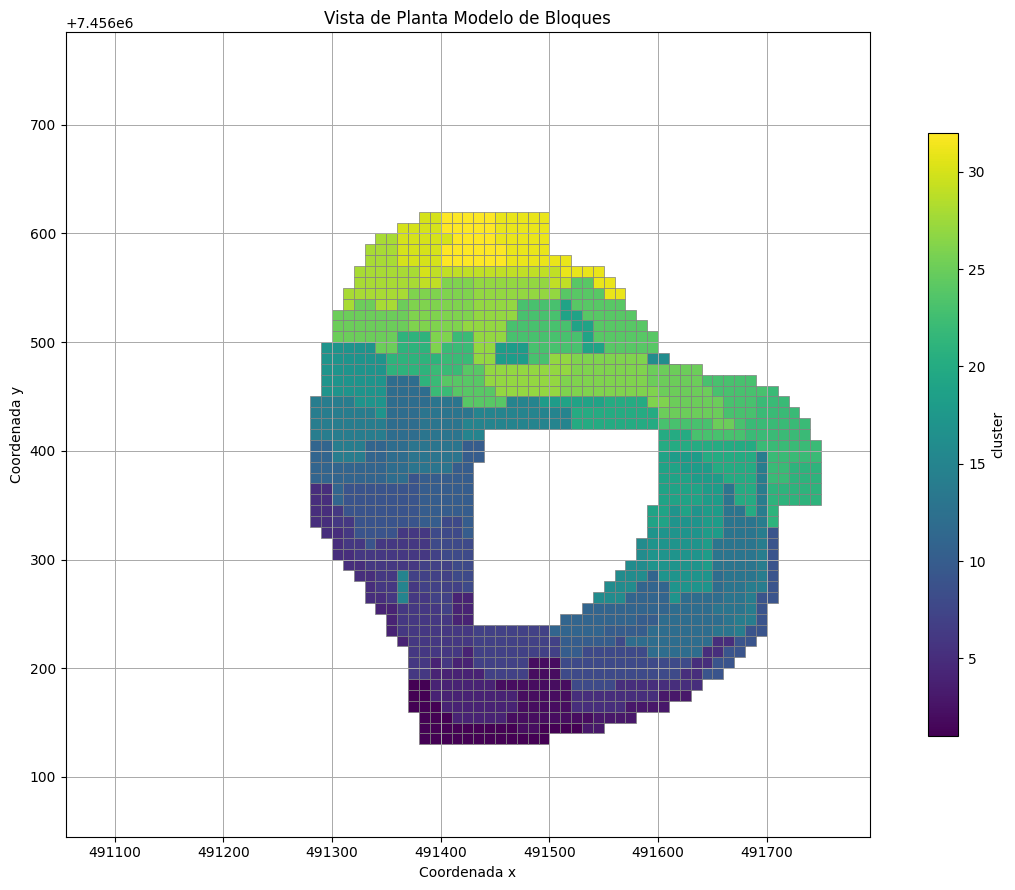

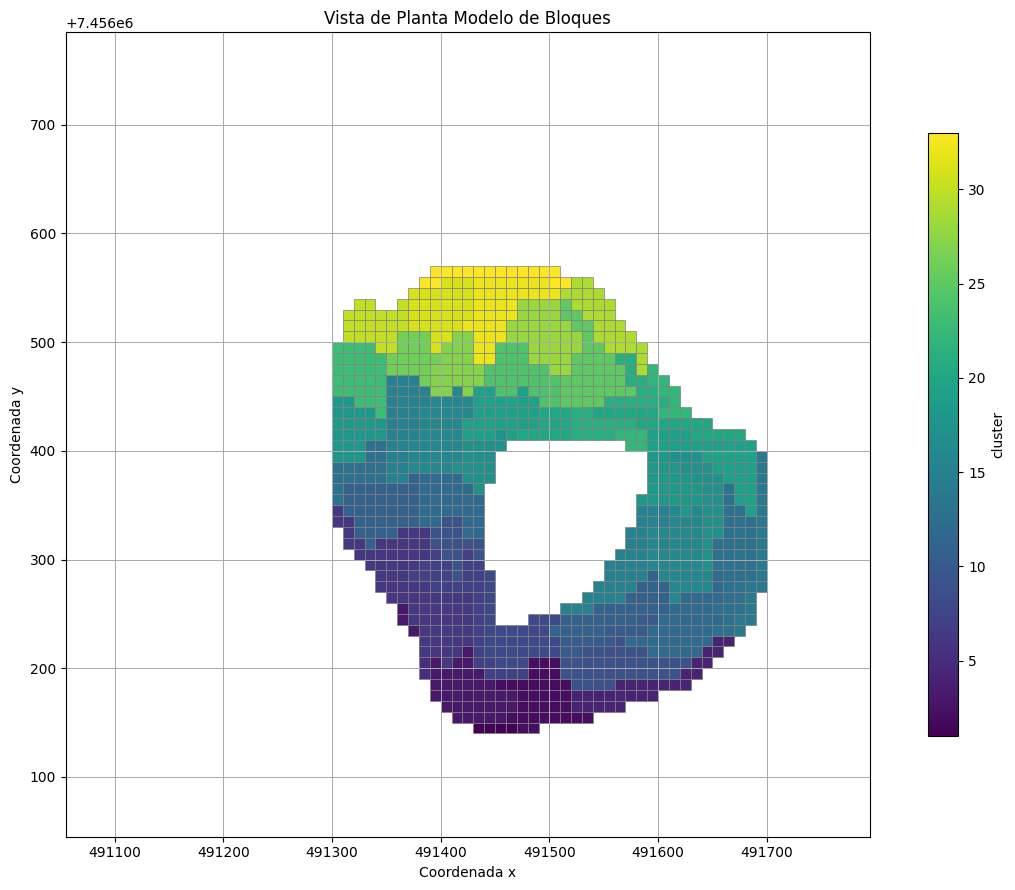

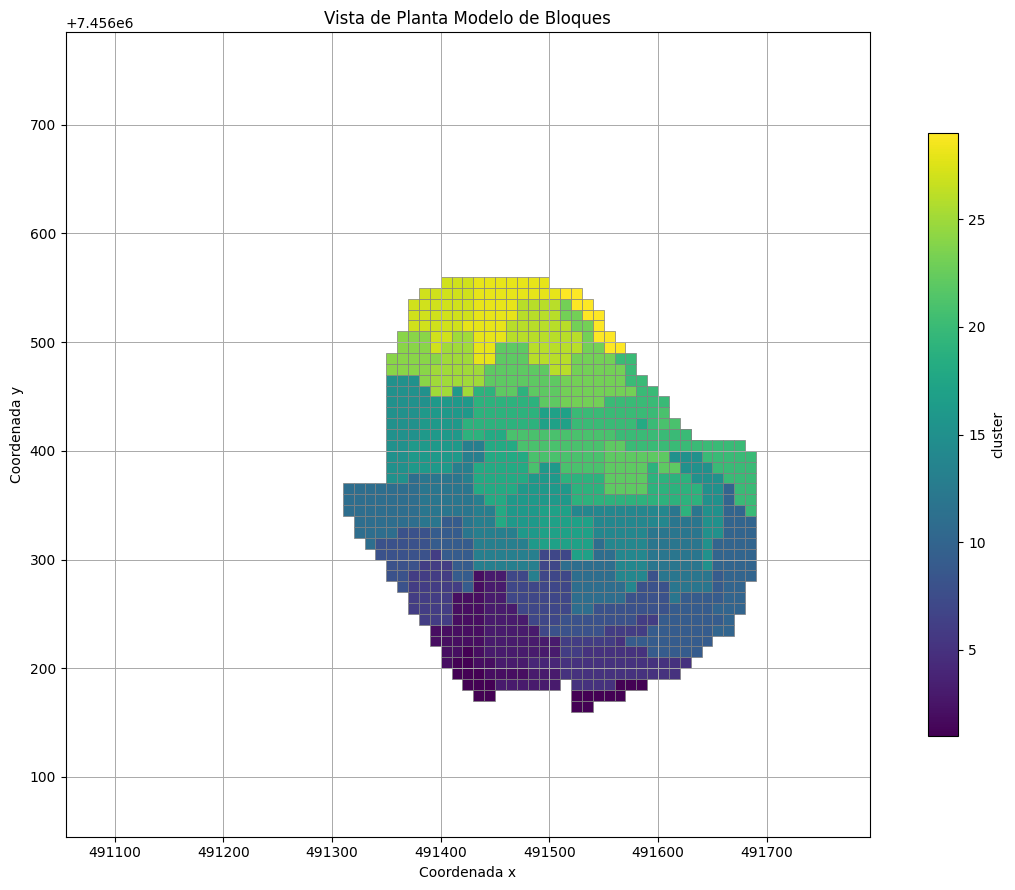

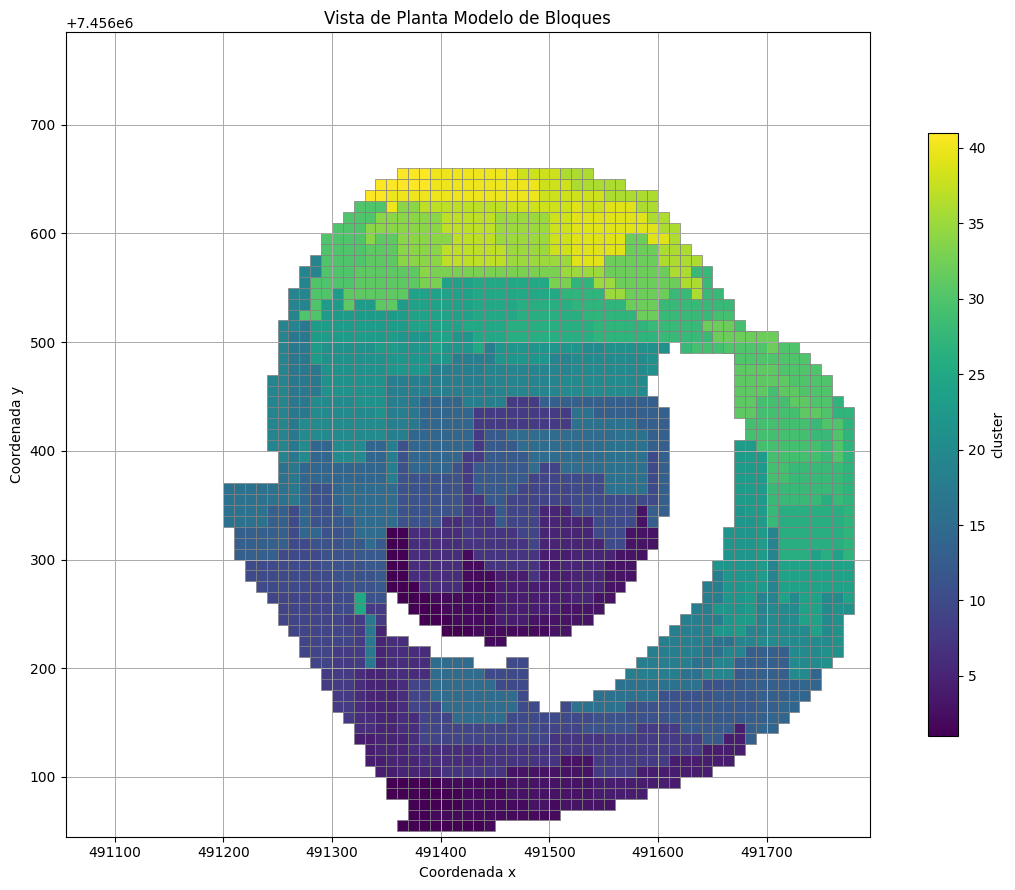

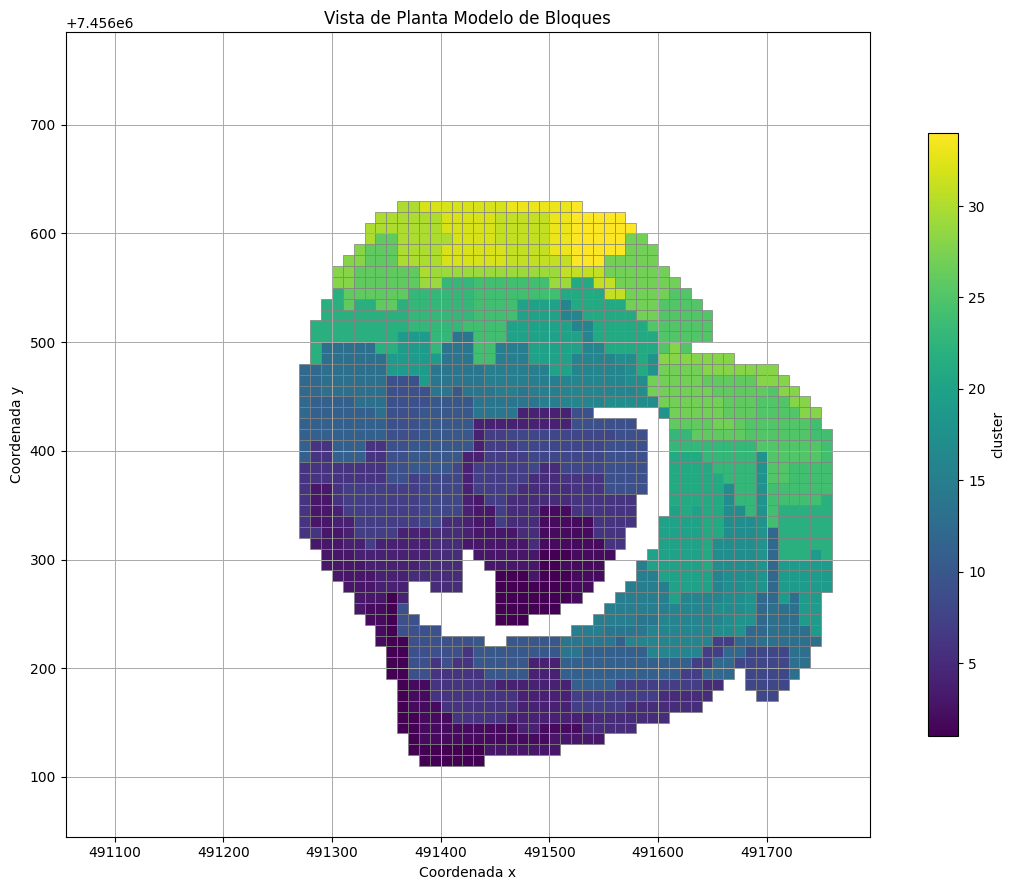

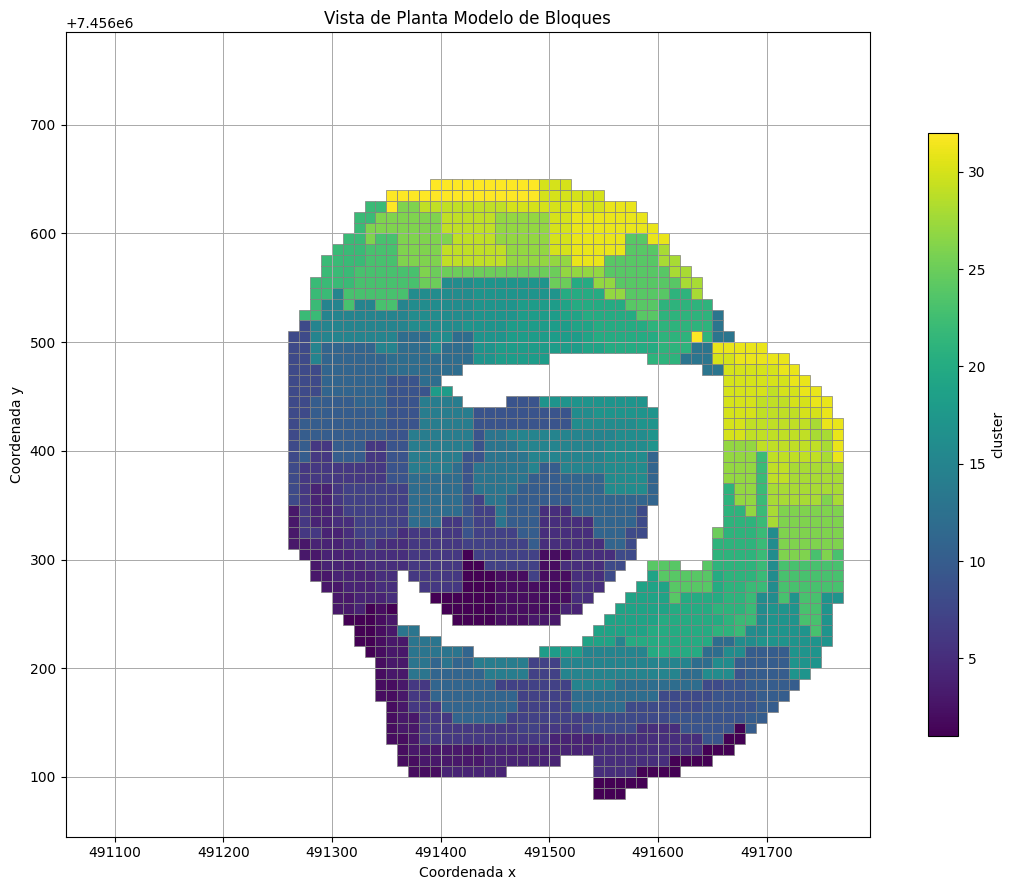

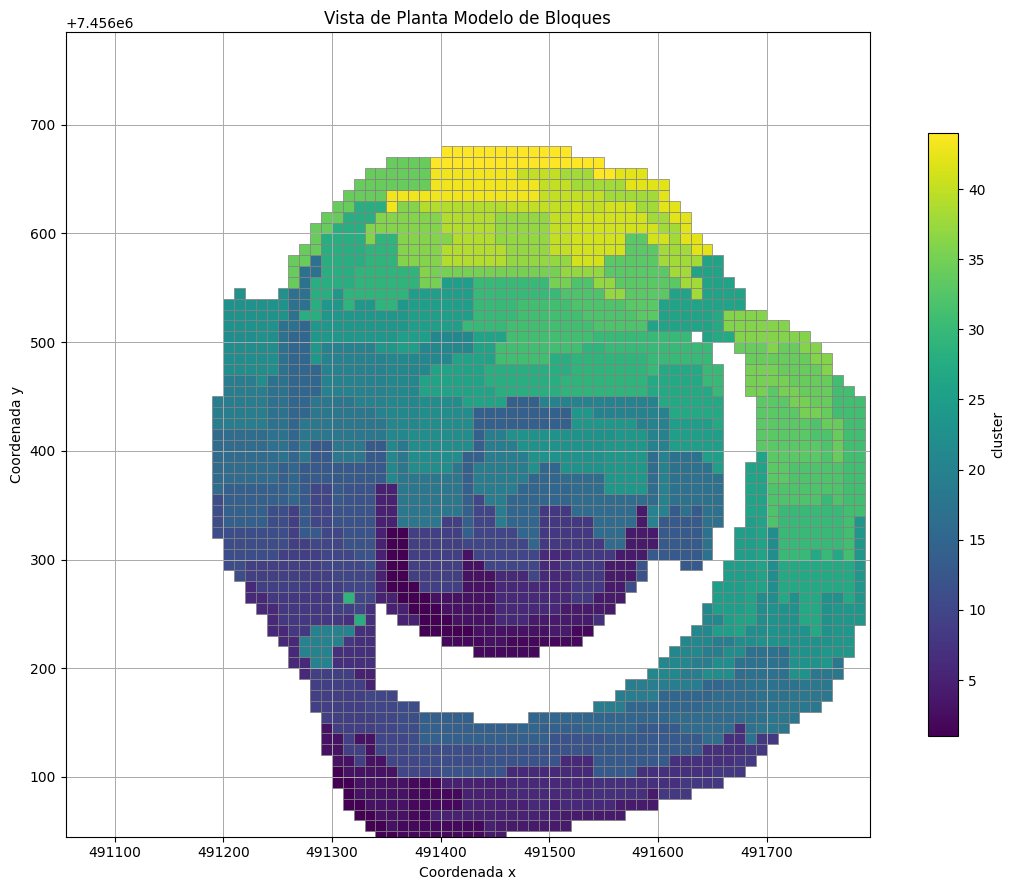

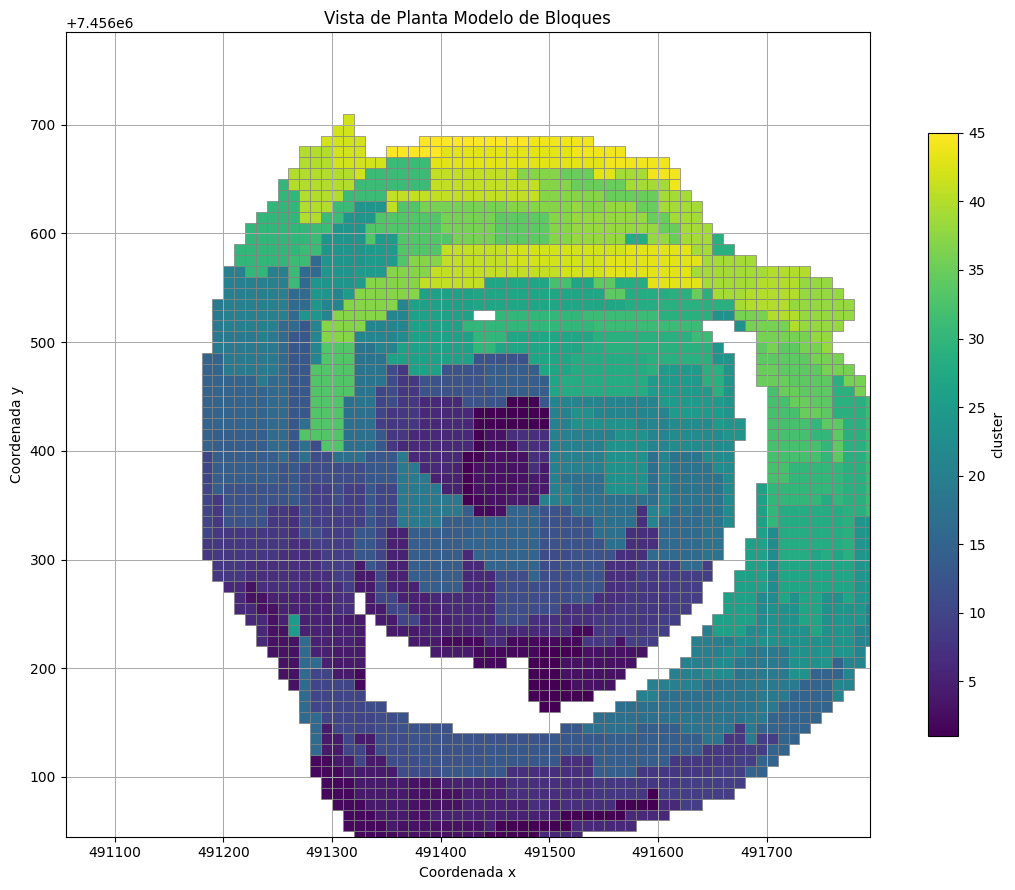

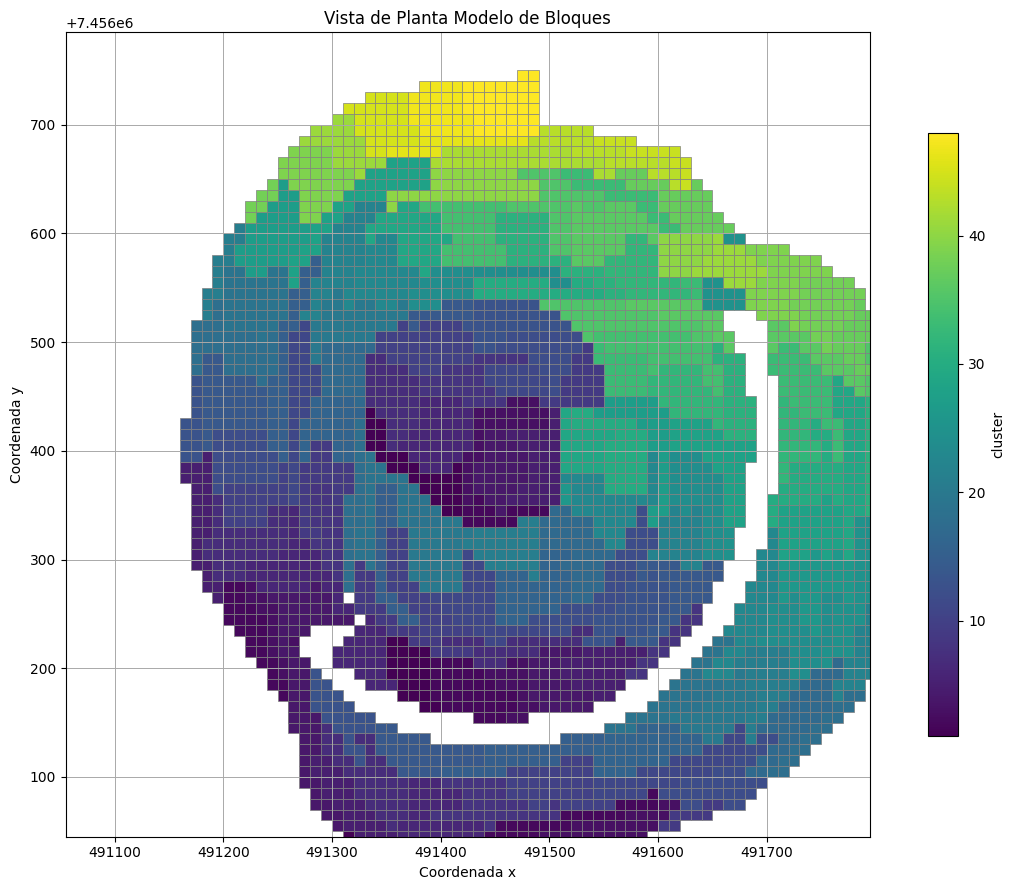

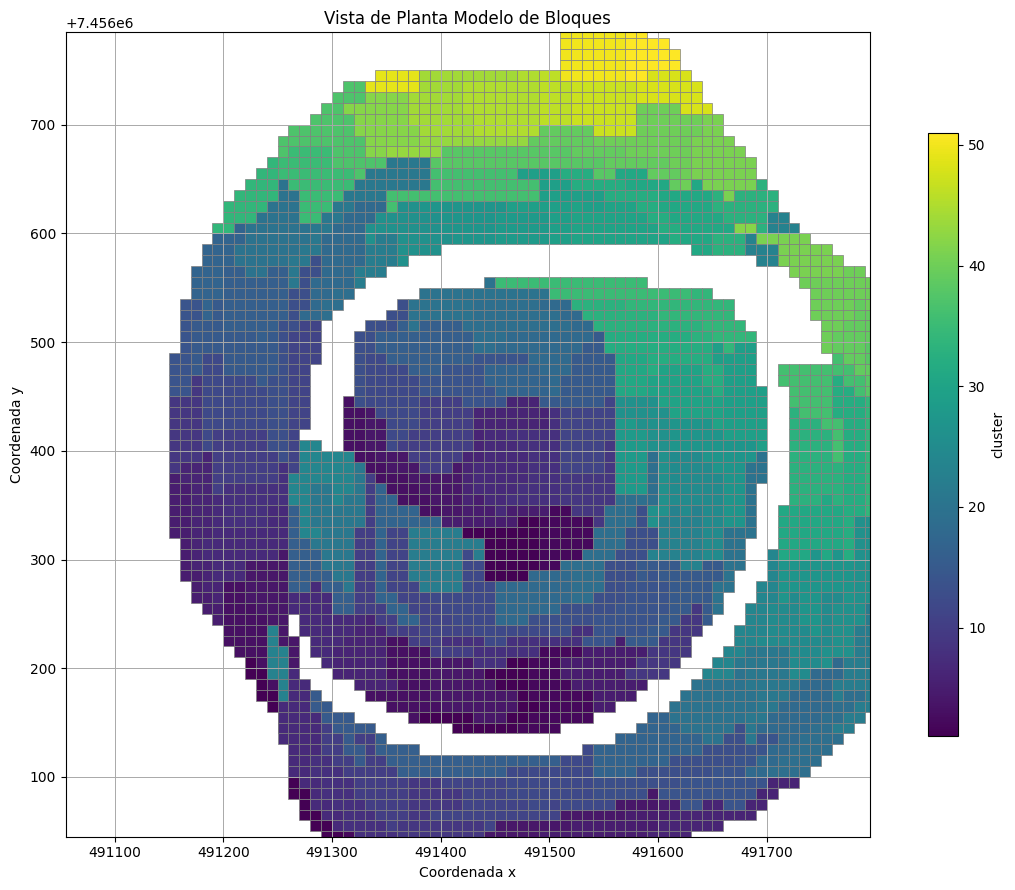

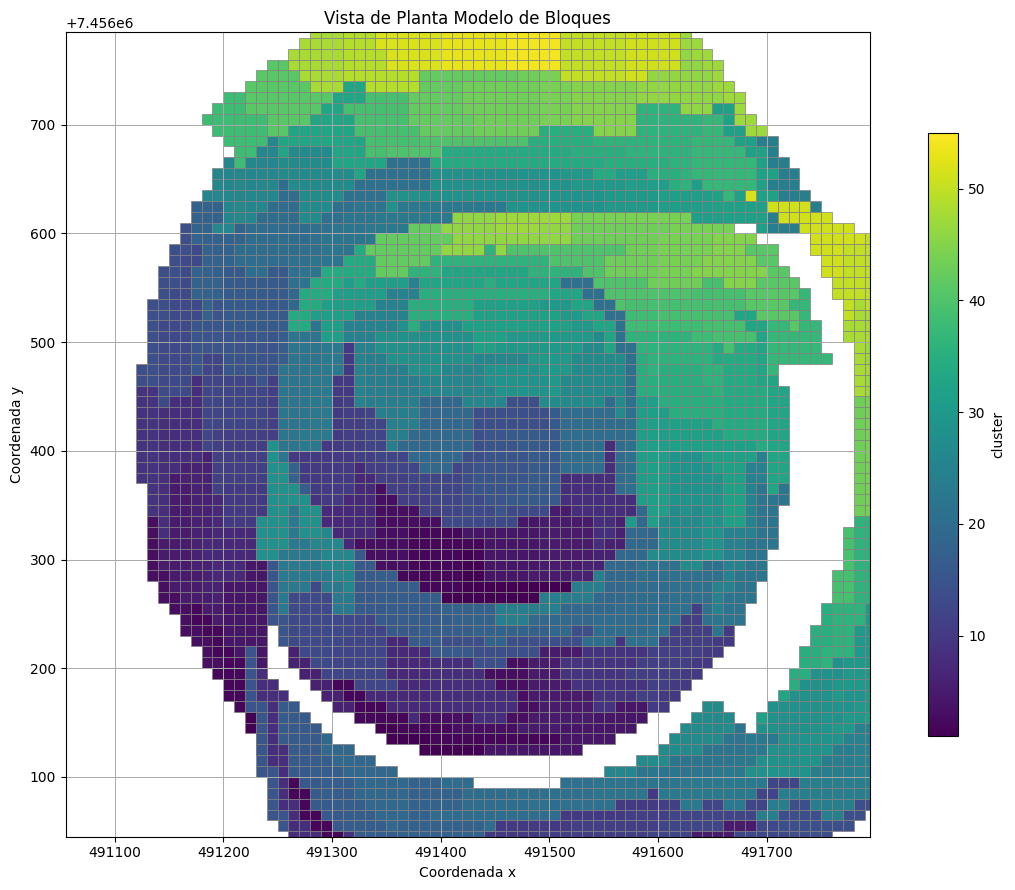

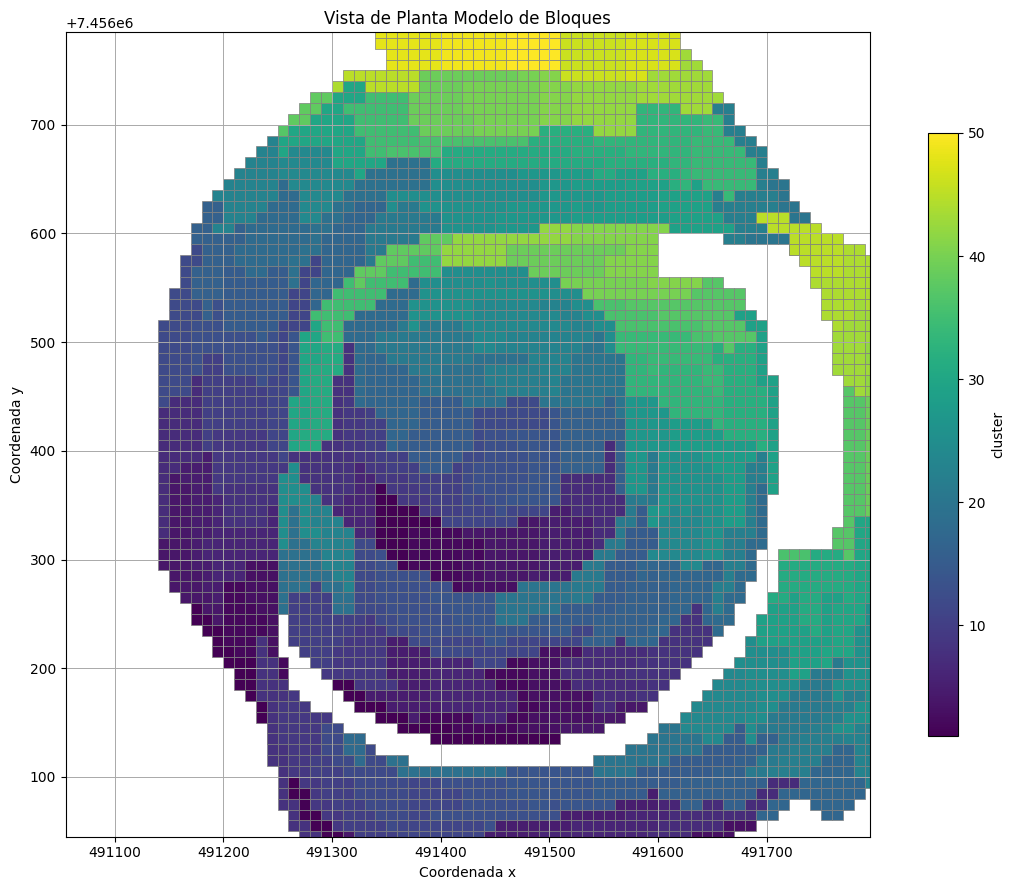

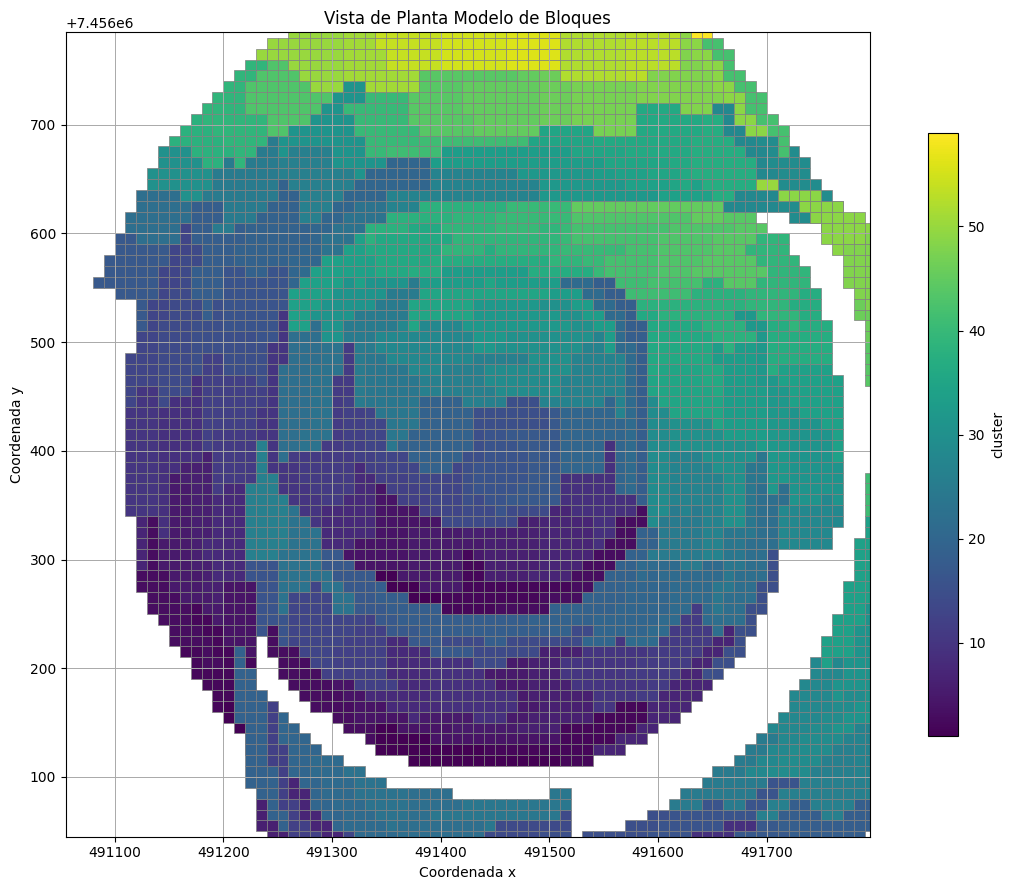

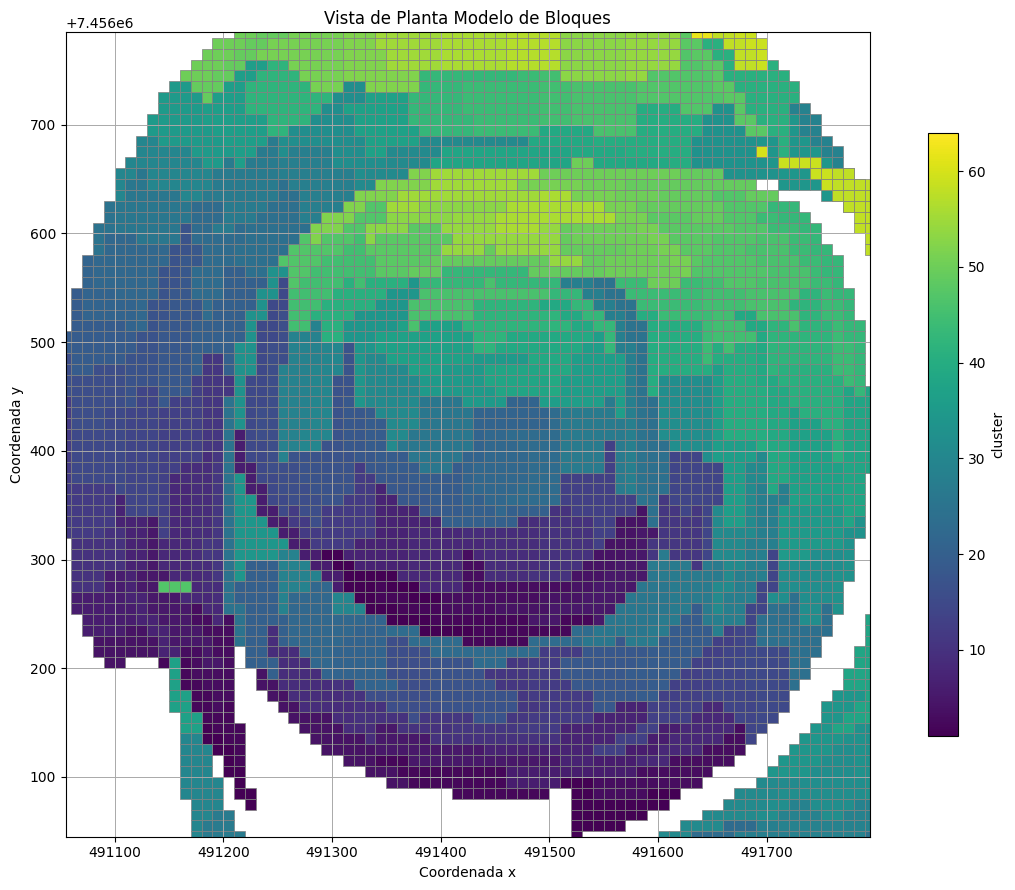

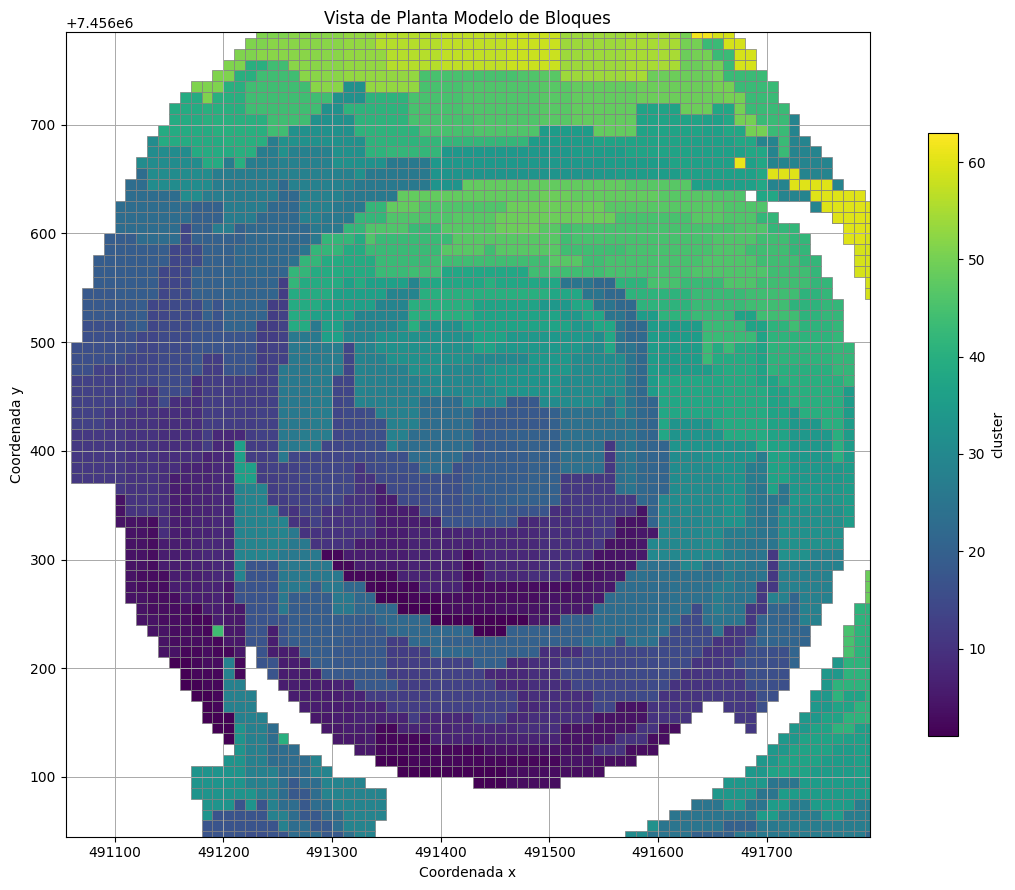

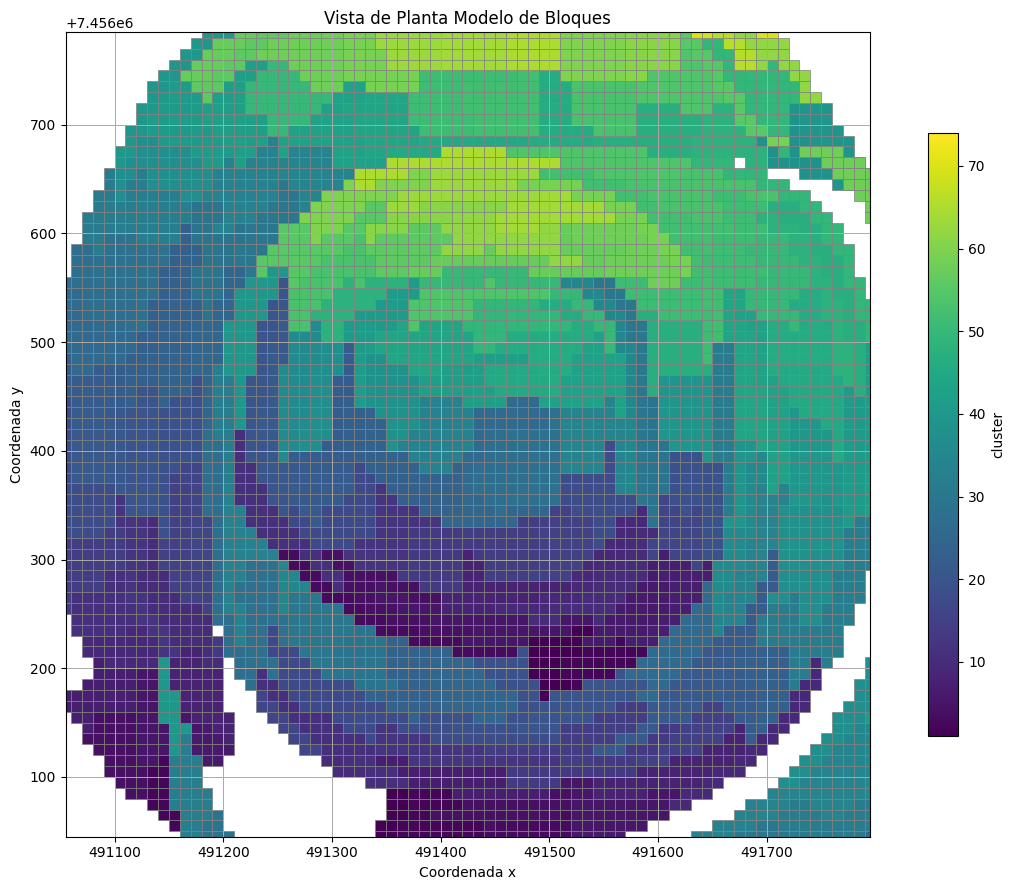

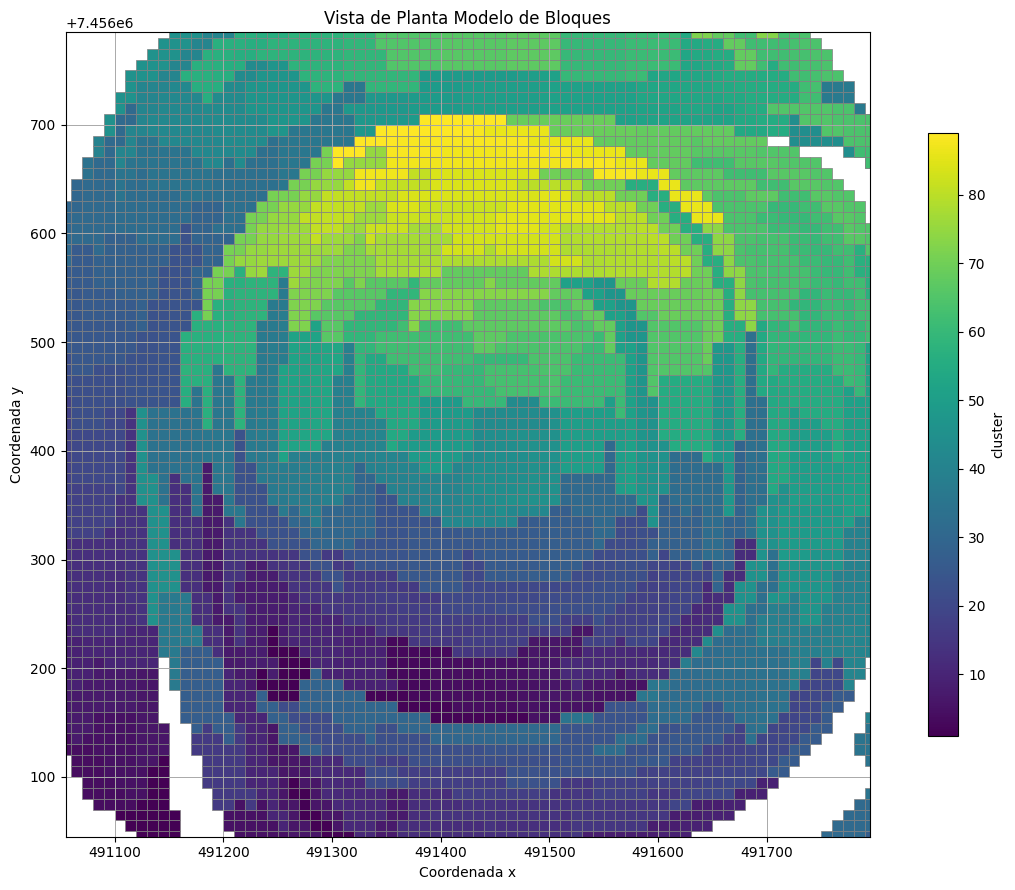

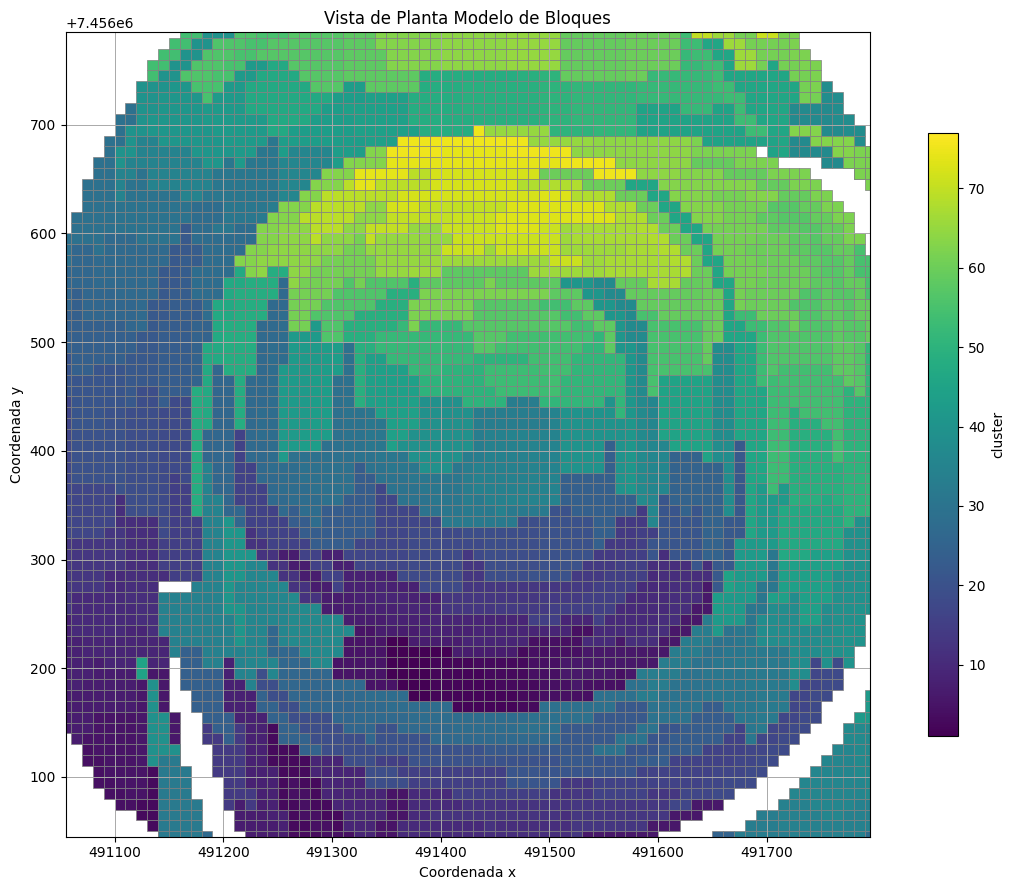

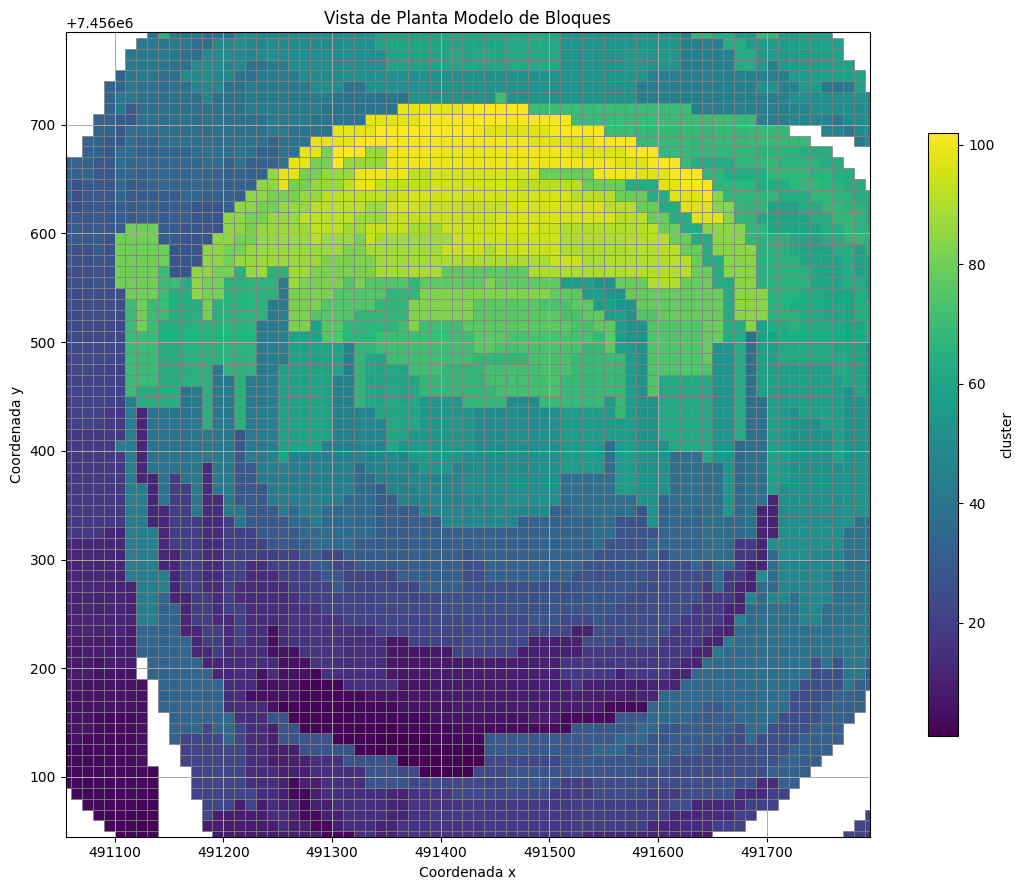

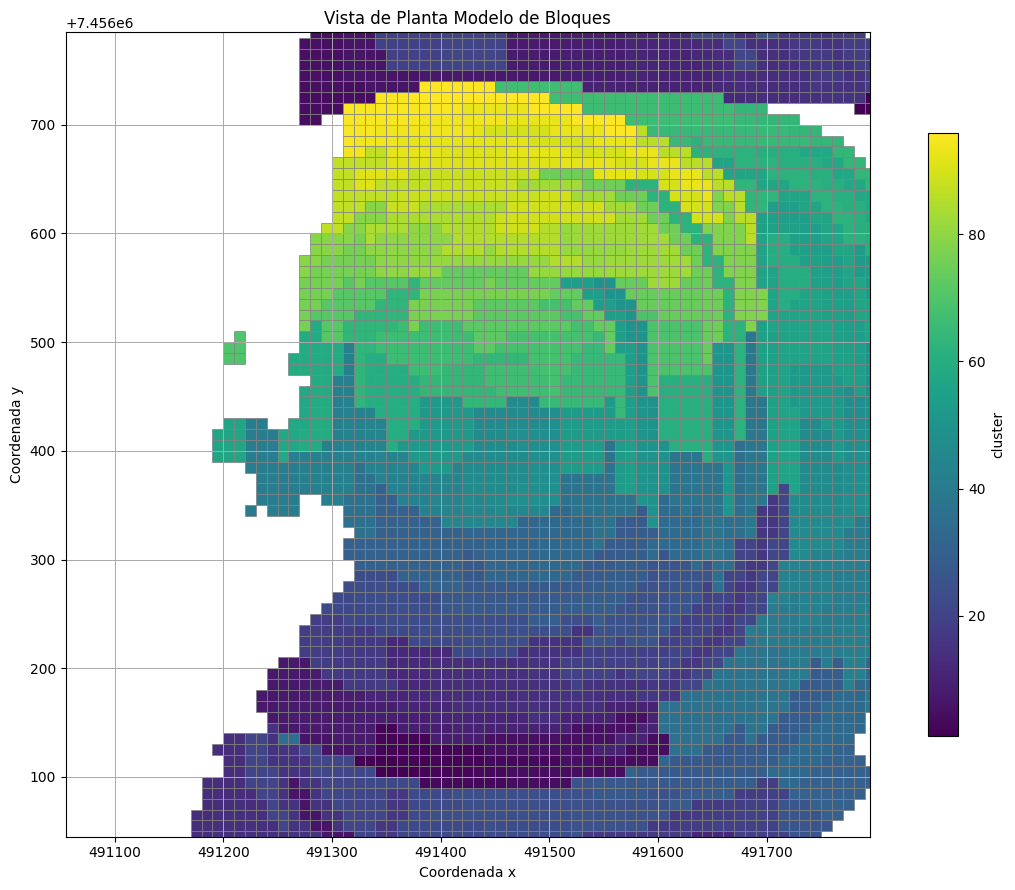

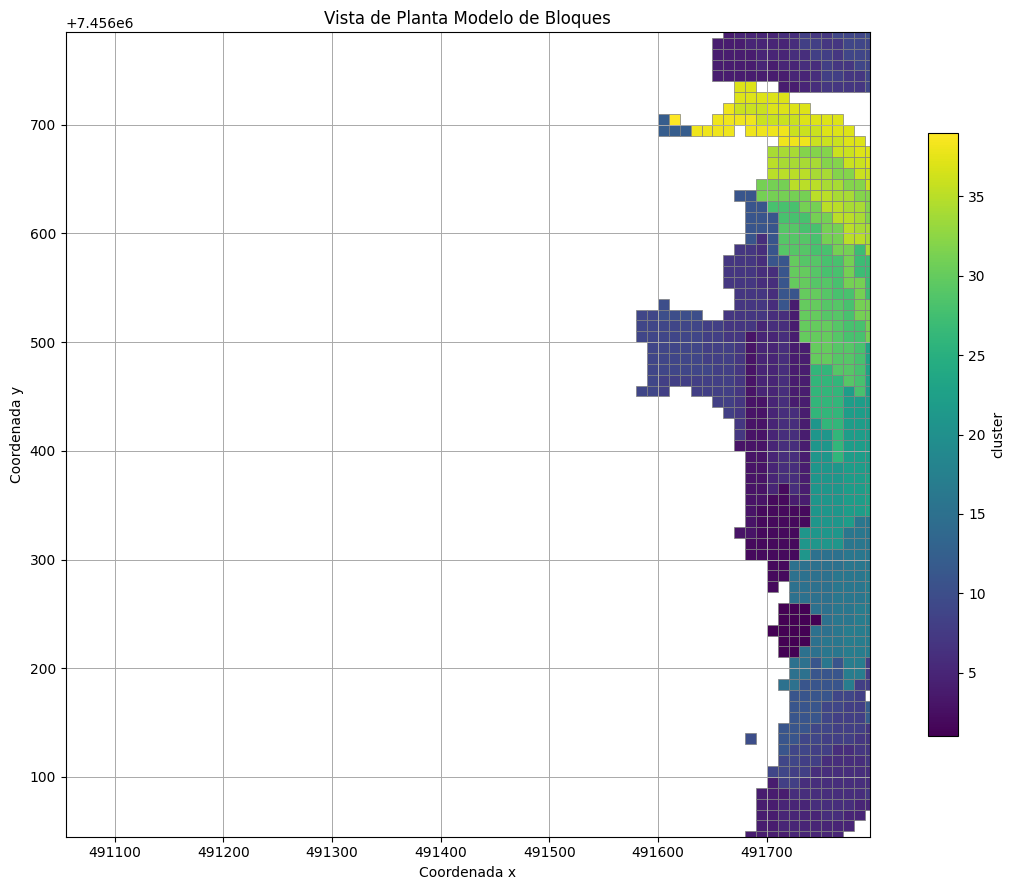

In [41]:
fase_data = df[df['fase']==1].copy()
x_min_global = fase_data['x'].min() - 5*10
x_max_global = fase_data['x'].max() + 5*10
y_min_global = fase_data['y'].min() - 5*10
y_max_global = fase_data['y'].max() + 5*10

for b in df['banco'].unique():
    df_ = df[(df['banco'] == b)]
    aux.plot_mine_blocks_adv(df_, color_by_col='cluster', xlim=(x_min_global, x_max_global),
                         ylim=(y_min_global, y_max_global), save=True, save_name=f'fase{1}banco{b}.png')


In [44]:
df['cluster']=-1
df['global_cluster']=''
sorted_unique_z = np.sort(df['z'].unique())
first = True
for Z in sorted_unique_z:
    print(f"---Procesando Z={Z}")
    filtered_df = df[df['z']==Z]
    # Extraes solo las columnas 'fase' y 'banco' y eliminas duplicados
    df_unicos = filtered_df[['fase', 'banco']].drop_duplicates()
    # Lo pasas a lista de tuplas
    tuplas_unicas = list(df_unicos.itertuples(index=False, name=None))
    if first:#Hacemos clustering sin tomar precedencias
        for (f,b) in tuplas_unicas:
            print(f"---Procesando Fase {f} - Banco {b}")
            df_fb = df[(df['fase']==f)&(df['banco']==b)].copy()
            df_fb.reset_index(drop=True, inplace=True)
            A = aux.Calculate_Adjency_Matrix(df_fb, BlockWidth, BlockHeight)
            S = aux.Calculate_Similarity_Matrix(df_fb)
            print(f"---Clustering de Fase {f} - Banco {b}")
            current_final_clusters = aux.hierarchical_mine_clustering_adaptado(df_fb,A,S,max_cluster_size,1)
            current_bench_cluster_map = {}
            for cluster_idx, cluster_data in enumerate(current_final_clusters):
                cluster_label = cluster_idx + 1 # Etiqueta 1..K para este banco
                # Crear una etiqueta global única (opcional pero recomendado)
                global_cluster_label = f"F{f}_B{b}_C{cluster_label}"
                for block_id in cluster_data['blocks']:
                    current_bench_cluster_map[block_id] = cluster_label # Mapeo para el siguiente banco
                    # Asignar al DataFrame principal usando la etiqueta global
                    df.loc[df['id'] == block_id, 'cluster'] = cluster_label # Guarda el ID local del banco
                    df.loc[df['id'] == block_id, 'global_cluster'] = global_cluster_label # Guarda etiqueta global
            ### Shape Refinement ###
            print('---Shape Refinement')
            df_fb = df[(df['fase']==f)&(df['banco']==b)].copy()
            df_fb.reset_index(drop=True, inplace=True)
            A = tbsh.Calculate_Adjency_Matrix(df_fb, BlockWidth, BlockHeight)
            data_shape_refinement = tbsh.Shape_Refinement_Tabesh(df_fb, A, Iterations_PostProcessing=Iterations_PostProcessing, Min_Cluster_Length=Min_Cluster_Length)
            df_fb1 = data_shape_refinement[0]
            # Ahora creamos 'global_cluster' basado en fase f y banco b
            df_fb1['global_cluster'] = df_fb1['cluster'].apply(lambda c: f"F{f}_B{b}_C{c}")

            # Luego actualizas en el df padre
            # Creamos un pequeño dataframe temporal con los valores nuevos
            update_df = df_fb1[['id', 'cluster', 'global_cluster']].copy()

            # Hacemos un merge sobre el df original
            df = df.merge(update_df, on='id', how='left', suffixes=('', '_new'))

            # Ahora actualizamos solamente si hay nueva información
            for col in ['cluster', 'global_cluster']:
                df[col] = df[f'{col}_new'].combine_first(df[col])
                df.drop(columns=[f'{col}_new'], inplace=True)
            #######################
        first=False
    else: #Hay que tomar en cuenta si hay precedencias
        
        for (f,b) in tuplas_unicas:
            print(f"---Procesando Fase {f} - Banco {b}")
            df_fb = df[(df['fase']==f)&(df['banco']==b)].copy()
            df_fb.reset_index(drop=True, inplace=True)
            if (f,b) in precedence_tree:
                print(f"---Precedencias Detectadas")
                print(precedence_tree[(f,b)])
                dfs = [] #Guardado de dfs
                for (f_,b_) in precedence_tree[(f,b)]:
                    dfs.append( (df[(df['fase']==f_)&(df['banco']==b_)]).copy() )
                offset=0
                for df_ in dfs:
                    if not df_.empty:
                        # Ajustamos los clusters
                        df_['cluster'] = df_['cluster'] + offset
                        
                        # Actualizamos el offset: suma el máximo cluster de este df
                        offset = df_['cluster'].max()

                df_inf = pd.concat(dfs, ignore_index=True) #dataframe inferior a f,b
                df_sup = df_fb.copy()
                df_sup.reset_index(drop=True, inplace=True)
                df_sup['cluster'] = df_sup['id']
                A = aux.Calculate_Vertical_Adyacency_Matrix(df_sup,df_inf, BlockWidth=BlockWidth/4, BlockHeight=BlockHeight/4) # Tiene que ser estricto pues es para calcular C
                # Ahora calculamos la matriz C
                C = A@A.T
                C = (1-C)*c_coef+C
                S = aux.Calculate_Similarity_Matrix(df_sup)
                #Ahora la similaridad
                S = S*C
                A = aux.Calculate_Adjency_Matrix(df_sup,BlockWidth,BlockHeight)
                print(f"---Clustering de Fase {f} - Banco {b}")
                current_final_clusters = aux.hierarchical_mine_clustering_adaptado(df_fb,A,S,max_cluster_size,1)
                current_bench_cluster_map = {}
                for cluster_idx, cluster_data in enumerate(current_final_clusters):
                    cluster_label = cluster_idx + 1 # Etiqueta 1..K para este banco
                    # Crear una etiqueta global única (opcional pero recomendado)
                    global_cluster_label = f"F{f}_B{b}_C{cluster_label}"
                    for block_id in cluster_data['blocks']:
                        current_bench_cluster_map[block_id] = cluster_label # Mapeo para el siguiente banco
                        # Asignar al DataFrame principal usando la etiqueta global
                        df.loc[df['id'] == block_id, 'cluster'] = cluster_label # Guarda el ID local del banco
                        df.loc[df['id'] == block_id, 'global_cluster'] = global_cluster_label # Guarda etiqueta global

                ### Shape Refinement ###
                print('---Shape Refinement')
                df_fb = df[(df['fase']==f)&(df['banco']==b)].copy()
                df_fb.reset_index(drop=True, inplace=True)
                A = tbsh.Calculate_Adjency_Matrix(df_fb,BlockWidth,BlockHeight)
                data_shape_refinement = tbsh.Shape_Refinement_Tabesh(df_fb, A, Iterations_PostProcessing=Iterations_PostProcessing, Min_Cluster_Length=Min_Cluster_Length)
                df_fb1 = data_shape_refinement[0]
                # Ahora creamos 'global_cluster' basado en fase f y banco b
                df_fb1['global_cluster'] = df_fb1['cluster'].apply(lambda c: f"F{f}_B{b}_C{c}")

                # Luego actualizas en el df padre
                # Creamos un pequeño dataframe temporal con los valores nuevos
                update_df = df_fb1[['id', 'cluster', 'global_cluster']].copy()

                # Hacemos un merge sobre el df original
                df = df.merge(update_df, on='id', how='left', suffixes=('', '_new'))

                # Ahora actualizamos solamente si hay nueva información
                for col in ['cluster', 'global_cluster']:
                    df[col] = df[f'{col}_new'].combine_first(df[col])
                    df.drop(columns=[f'{col}_new'], inplace=True)
                #######################

            else: #(f,b) not in cleaned_tree
                 #CLustering normal
                A = aux.Calculate_Adjency_Matrix(df_fb,BlockWidth,BlockHeight)
                S = aux.Calculate_Similarity_Matrix(df_fb)
                print(f"---Clustering de Fase {f} - Banco {b}")
                current_final_clusters = aux.hierarchical_mine_clustering_adaptado(df_fb,A,S,max_cluster_size,1)

                #Asignacion Cluster al df maestro

                current_bench_cluster_map = {}
                for cluster_idx, cluster_data in enumerate(current_final_clusters):
                    cluster_label = cluster_idx + 1 # Etiqueta 1..K para este banco
                    # Crear una etiqueta global única (opcional pero recomendado)
                    global_cluster_label = f"F{f}_B{b}_C{cluster_label}"
                    for block_id in cluster_data['blocks']:
                        current_bench_cluster_map[block_id] = cluster_label # Mapeo para el siguiente banco
                        # Asignar al DataFrame principal usando la etiqueta global
                        df.loc[df['id'] == block_id, 'cluster'] = cluster_label # Guarda el ID local del banco
                        df.loc[df['id'] == block_id, 'global_cluster'] = global_cluster_label # Guarda etiqueta global

                ### Shape Refinement ###
                print('---Shape Refinement')
                df_fb = df[(df['fase']==f)&(df['banco']==b)].copy()
                df_fb.reset_index(drop=True, inplace=True)
                A = tbsh.Calculate_Adjency_Matrix(df_fb,BlockWidth,BlockHeight)
                data_shape_refinement = tbsh.Shape_Refinement_Tabesh(df_fb, A, Iterations_PostProcessing=Iterations_PostProcessing, Min_Cluster_Length=Min_Cluster_Length)
                df_fb1 = data_shape_refinement[0]
                # Ahora creamos 'global_cluster' basado en fase f y banco b
                df_fb1['global_cluster'] = df_fb1['cluster'].apply(lambda c: f"F{f}_B{b}_C{c}")

                # Luego actualizas en el df padre
                # Creamos un pequeño dataframe temporal con los valores nuevos
                update_df = df_fb1[['id', 'cluster', 'global_cluster']].copy()

                # Hacemos un merge sobre el df original
                df = df.merge(update_df, on='id', how='left', suffixes=('', '_new'))

                # Ahora actualizamos solamente si hay nueva información
                for col in ['cluster', 'global_cluster']:
                    df[col] = df[f'{col}_new'].combine_first(df[col])
                    df.drop(columns=[f'{col}_new'], inplace=True)
                #######################



     

---Procesando Z=2096.0
---Procesando Fase 1 - Banco 14
---Clustering de Fase 1 - Banco 14
---Shape Refinement
========PostProcessing Results========
Total de clusters: 4
Tiempo: 0.40818190574645996
---Procesando Z=2112.0
---Procesando Fase 1 - Banco 13
---Precedencias Detectadas
[(1, 14)]
---Clustering de Fase 1 - Banco 13
---Shape Refinement
========PostProcessing Results========
Total de clusters: 7
Tiempo: 0.48619961738586426
---Procesando Z=2128.0
---Procesando Fase 1 - Banco 12
---Precedencias Detectadas
[(1, 13)]
---Clustering de Fase 1 - Banco 12
---Shape Refinement
========PostProcessing Results========
Total de clusters: 12
Tiempo: 0.7800147533416748
---Procesando Z=2144.0
---Procesando Fase 1 - Banco 11
---Precedencias Detectadas
[(1, 12)]
---Clustering de Fase 1 - Banco 11
---Shape Refinement
========PostProcessing Results========
Total de clusters: 16
Tiempo: 1.1177380084991455
---Procesando Z=2160.0
---Procesando Fase 1 - Banco 10
---Precedencias Detectadas
[(1, 11)]
---Cl

In [56]:
df.to_csv("df_mina_clustered_w_shape_refinement.csv", index=False)

In [28]:
df_fb = df[(df['fase']==10)&(df['banco']==49)]
df_fb.reset_index(drop=True,inplace=True)

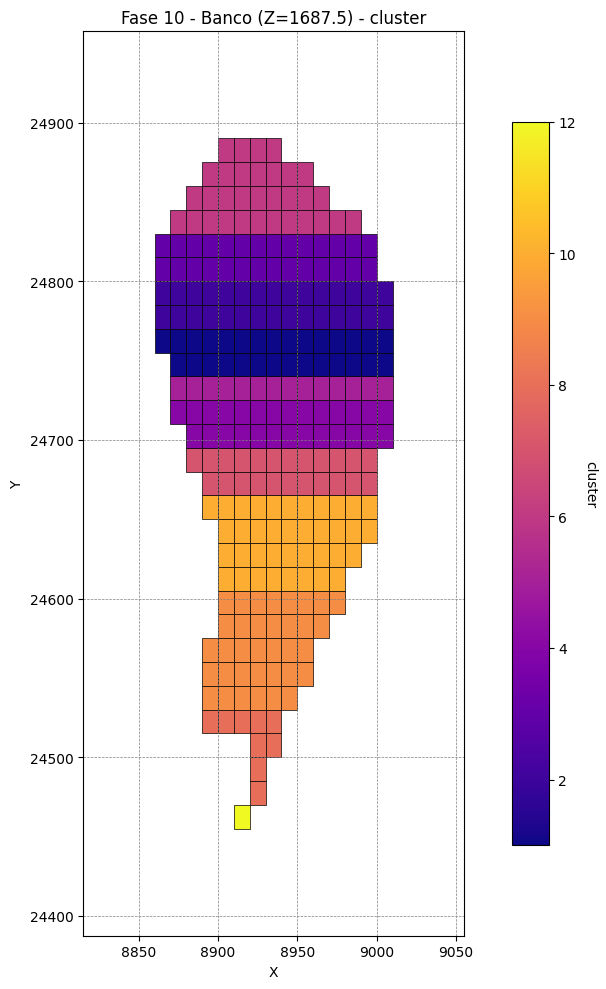

In [27]:
tbsh.plot_fase_banco(df_fb,10,15,'cluster',show_block_label=False)

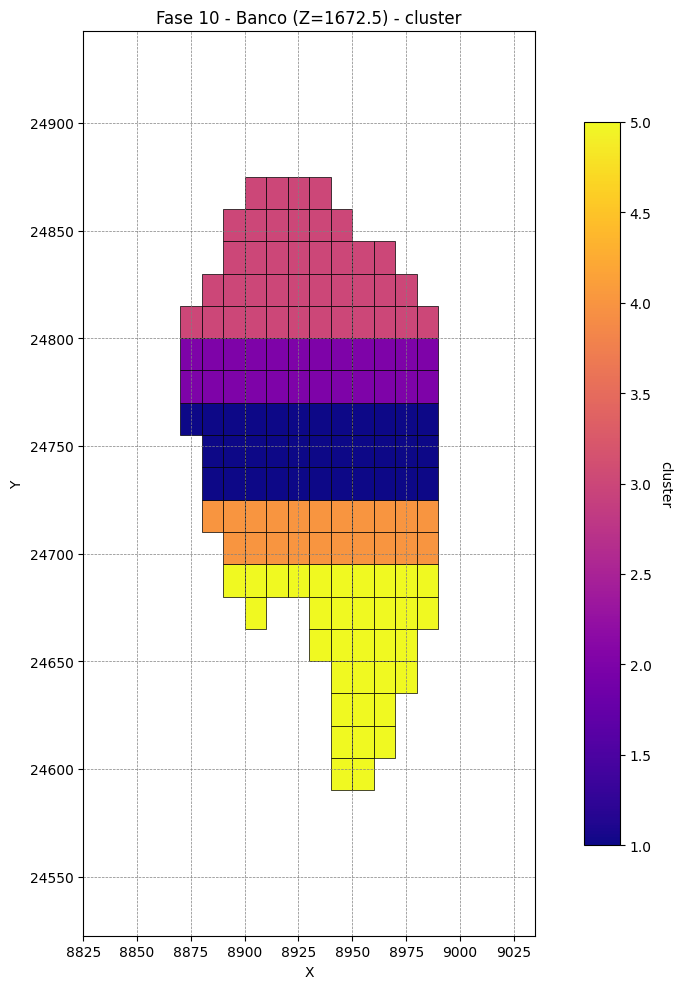

In [29]:
tbsh.plot_fase_banco(df_fb,10,15,'cluster',show_block_label=False)

Tratando 'cluster' como Continua.
  Escala de color: min=13.00, max=138.00


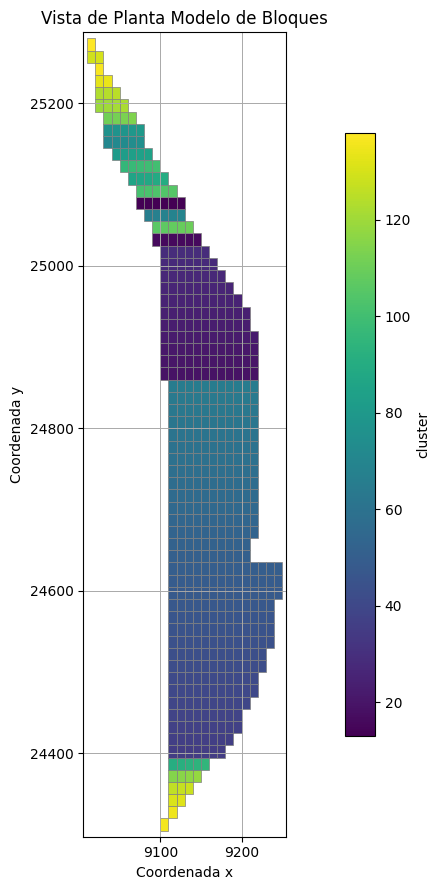

In [ ]:
aux.plot_mine_blocks_adv(df_fb,'cluster',block_width=10,block_height=15)

In [4]:
df_mina_clustered

x          y       z        au       cpy      cueq       cus  \
0      491425.0  7456205.0  1968.0  0.288929  1.124707  0.712658  0.022003   
1      491435.0  7456195.0  1968.0  0.266522  1.057851  0.640223  0.021141   
2      491445.0  7456195.0  1968.0  0.243283  2.427782  0.531022  0.019991   
3      491455.0  7456195.0  1968.0  0.243283  2.427782  0.531022  0.019991   
4      491435.0  7456205.0  1968.0  0.288929  1.124707  0.712658  0.022003   
...         ...        ...     ...       ...       ...       ...       ...   
91277  491985.0  7456545.0  2320.0  0.010000  0.043324  0.015000  0.001000   
91278  491975.0  7456555.0  2320.0  0.010000  0.043324  0.015000  0.001000   
91279  491985.0  7456555.0  2320.0  0.010000  0.043324  0.015000  0.001000   
91280  491975.0  7456565.0  2320.0  0.017194  0.112734  0.039031  0.006303   
91281  491975.0  7456575.0  2320.0  0.017194  0.112734  0.039031  0.006303   

            cut   density  material        py    recg_au    recg_cu     tasox  \
0      0.550661  2.615598         8  0.401511  69.001505  87.011938  0.039957   
1      0.491924  2.626056         8  0.197908  68.839492  87.471598  0.042976   
2      0.396348  2.637350         6  0.399009  68.633711  87.659524  0.050438   
3      0.396348  2.637350         6  0.399009  68.633711  87.659524  0.050438   
4      0.550661  2.615598         8  0.401511  69.001505  87.011938  0.039957   
...         ...       ...       ...       ...        ...        ...       ...   
91277  0.015000  2.352000         0  0.000000   0.000000   0.000000  0.066667   
91278  0.015000  2.352000         0  0.000000   0.000000   0.000000  0.066667   
91279  0.015000  2.352000         0  0.000000   0.000000   0.000000  0.066667   
91280  0.039031  2.352000         0  0.000000   0.000000   0.000000  0.161474   
91281  0.039031  2.352000         0  0.000000   0.000000   0.000000  0.161474   

       tipomineral  fase     id  banco  final_cluster_id final_cluster_label  
0                2     4      1     22                 1           F4_B22_C1  
1                2     4      2     22                 1           F4_B22_C1  
2                2     4      3     22                 1           F4_B22_C1  
3                2     4      4     22                 1           F4_B22_C1  
4                2     4      5     22                 1           F4_B22_C1  
...            ...   ...    ...    ...               ...                 ...  
91277            0     3  91278      2                 6            F3_B2_C6  
91278            0     3  91279      2                 6            F3_B2_C6  
91279            0     3  91280      2                 6            F3_B2_C6  
91280            0     3  91281      2                 6            F3_B2_C6  
91281            0     3  91282      2                 6            F3_B2_C6  

[91282 rows x 20 columns]

In [5]:
df_mina_clustered.to_csv("df_mina_clustered_4.csv", index=False)

In [10]:
df_mina_clustered = pd.read_csv("df_mina_clustered_4.csv")
df_mina_clustered.rename(columns={'final_cluster_id': 'cluster'}, inplace=True)
df = df_mina_clustered.copy()

In [3]:
df

x          y       z        au       cpy      cueq       cus  \
0      491425.0  7456205.0  1968.0  0.288929  1.124707  0.712658  0.022003   
1      491435.0  7456195.0  1968.0  0.266522  1.057851  0.640223  0.021141   
2      491445.0  7456195.0  1968.0  0.243283  2.427782  0.531022  0.019991   
3      491455.0  7456195.0  1968.0  0.243283  2.427782  0.531022  0.019991   
4      491435.0  7456205.0  1968.0  0.288929  1.124707  0.712658  0.022003   
...         ...        ...     ...       ...       ...       ...       ...   
91277  491985.0  7456545.0  2320.0  0.010000  0.043324  0.015000  0.001000   
91278  491975.0  7456555.0  2320.0  0.010000  0.043324  0.015000  0.001000   
91279  491985.0  7456555.0  2320.0  0.010000  0.043324  0.015000  0.001000   
91280  491975.0  7456565.0  2320.0  0.017194  0.112734  0.039031  0.006303   
91281  491975.0  7456575.0  2320.0  0.017194  0.112734  0.039031  0.006303   

            cut   density  material        py    recg_au    recg_cu     tasox  \
0      0.550661  2.615598         8  0.401511  69.001505  87.011938  0.039957   
1      0.491924  2.626056         8  0.197908  68.839492  87.471598  0.042976   
2      0.396348  2.637350         6  0.399009  68.633711  87.659524  0.050438   
3      0.396348  2.637350         6  0.399009  68.633711  87.659524  0.050438   
4      0.550661  2.615598         8  0.401511  69.001505  87.011938  0.039957   
...         ...       ...       ...       ...        ...        ...       ...   
91277  0.015000  2.352000         0  0.000000   0.000000   0.000000  0.066667   
91278  0.015000  2.352000         0  0.000000   0.000000   0.000000  0.066667   
91279  0.015000  2.352000         0  0.000000   0.000000   0.000000  0.066667   
91280  0.039031  2.352000         0  0.000000   0.000000   0.000000  0.161474   
91281  0.039031  2.352000         0  0.000000   0.000000   0.000000  0.161474   

       tipomineral  fase     id  banco  cluster final_cluster_label  
0                2     4      1     22        1           F4_B22_C1  
1                2     4      2     22        1           F4_B22_C1  
2                2     4      3     22        1           F4_B22_C1  
3                2     4      4     22        1           F4_B22_C1  
4                2     4      5     22        1           F4_B22_C1  
...            ...   ...    ...    ...      ...                 ...  
91277            0     3  91278      2        6            F3_B2_C6  
91278            0     3  91279      2        6            F3_B2_C6  
91279            0     3  91280      2        6            F3_B2_C6  
91280            0     3  91281      2        6            F3_B2_C6  
91281            0     3  91282      2        6            F3_B2_C6  

[91282 rows x 20 columns]

In [7]:
df = pd.read_csv("df_mina_clustered_4.csv")

In [9]:
df

x          y       z        au       cpy      cueq       cus  \
0      491425.0  7456205.0  1968.0  0.288929  1.124707  0.712658  0.022003   
1      491435.0  7456195.0  1968.0  0.266522  1.057851  0.640223  0.021141   
2      491445.0  7456195.0  1968.0  0.243283  2.427782  0.531022  0.019991   
3      491455.0  7456195.0  1968.0  0.243283  2.427782  0.531022  0.019991   
4      491435.0  7456205.0  1968.0  0.288929  1.124707  0.712658  0.022003   
...         ...        ...     ...       ...       ...       ...       ...   
91277  491985.0  7456545.0  2320.0  0.010000  0.043324  0.015000  0.001000   
91278  491975.0  7456555.0  2320.0  0.010000  0.043324  0.015000  0.001000   
91279  491985.0  7456555.0  2320.0  0.010000  0.043324  0.015000  0.001000   
91280  491975.0  7456565.0  2320.0  0.017194  0.112734  0.039031  0.006303   
91281  491975.0  7456575.0  2320.0  0.017194  0.112734  0.039031  0.006303   

            cut   density  material  ...    recg_au    recg_cu     tasox  \
0      0.550661  2.615598         8  ...  69.001505  87.011938  0.039957   
1      0.491924  2.626056         8  ...  68.839492  87.471598  0.042976   
2      0.396348  2.637350         6  ...  68.633711  87.659524  0.050438   
3      0.396348  2.637350         6  ...  68.633711  87.659524  0.050438   
4      0.550661  2.615598         8  ...  69.001505  87.011938  0.039957   
...         ...       ...       ...  ...        ...        ...       ...   
91277  0.015000  2.352000         0  ...   0.000000   0.000000  0.066667   
91278  0.015000  2.352000         0  ...   0.000000   0.000000  0.066667   
91279  0.015000  2.352000         0  ...   0.000000   0.000000  0.066667   
91280  0.039031  2.352000         0  ...   0.000000   0.000000  0.161474   
91281  0.039031  2.352000         0  ...   0.000000   0.000000  0.161474   

       tipomineral  fase     id  banco  final_cluster_id  final_cluster_label  \
0                2     4      1     22                 1            F4_B22_C1   
1                2     4      2     22                 1            F4_B22_C1   
2                2     4      3     22                 1            F4_B22_C1   
3                2     4      4     22                 1            F4_B22_C1   
4                2     4      5     22                 1            F4_B22_C1   
...            ...   ...    ...    ...               ...                  ...   
91277            0     3  91278      2                 6             F3_B2_C6   
91278            0     3  91279      2                 6             F3_B2_C6   
91279            0     3  91280      2                 6             F3_B2_C6   
91280            0     3  91281      2                 6             F3_B2_C6   
91281            0     3  91282      2                 6             F3_B2_C6   

      nivel  
0         1  
1         1  
2         1  
3         1  
4         1  
...     ...  
91277    23  
91278    23  
91279    23  
91280    23  
91281    23  

[91282 rows x 21 columns]

In [11]:
arcos = aux.Global_Vertical_Arc_Calculation(df)

In [6]:
arcos

defaultdict(list,
            {(np.int64(1), np.int64(2), 10): [(np.int64(1), np.int64(1), 2)],
             (np.int64(1), np.int64(2), 14): [(np.int64(1), np.int64(1), 2)],
             (np.int64(1), np.int64(2), 15): [(np.int64(1), np.int64(1), 2),
              (np.int64(1), np.int64(1), 3)],
             (np.int64(1), np.int64(2), 21): [(np.int64(1), np.int64(1), 4)],
             (np.int64(1), np.int64(2), 22): [(np.int64(1), np.int64(1), 2),
              (np.int64(1), np.int64(1), 3),
              (np.int64(1), np.int64(1), 4)],
             (np.int64(1), np.int64(2), 24): [(np.int64(1), np.int64(1), 4)],
             (np.int64(1), np.int64(2), 25): [(np.int64(1), np.int64(1), 3),
              (np.int64(1), np.int64(1), 4)],
             (np.int64(1), np.int64(2), 33): [(np.int64(1), np.int64(1), 5)],
             (np.int64(1), np.int64(2), 34): [(np.int64(1), np.int64(1), 4)],
             (np.int64(2), np.int64(2), 13): [(np.int64(1), np.int64(1), 1),
              (np.int64

### Metricas Clusterización

In [7]:
CV = aux.Coefficient_Variation(df)
rock = tbsh.Rock_Unity(df)

In [6]:
CV[0]

np.float64(0.7695154803382049)

In [9]:
rock[0]

np.float64(0.5437090393333402)

### Calculo de arcos locales

In [3]:
arcs = aux.Global_Vertical_Arc_Calculation(df)

In [7]:
CV[0]

np.float64(0.7695154803382049)

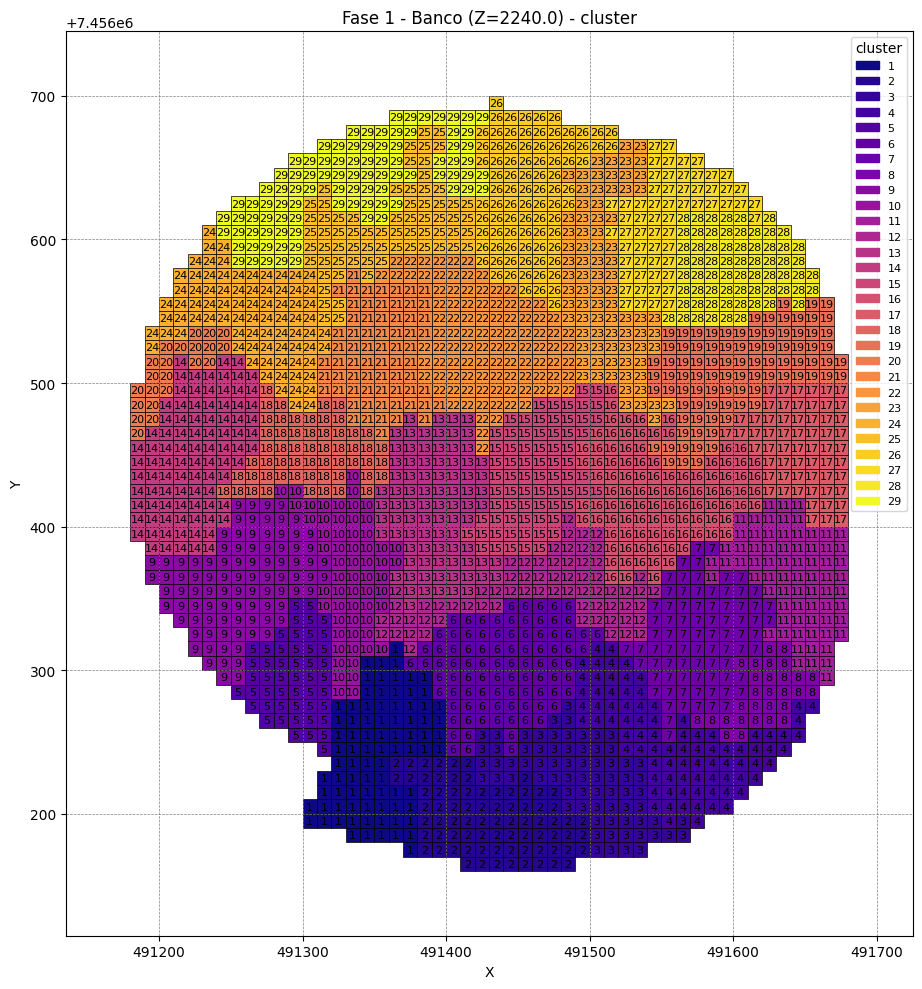

In [43]:
tbsh.plot_fase_banco(df_sup, 'cluster')

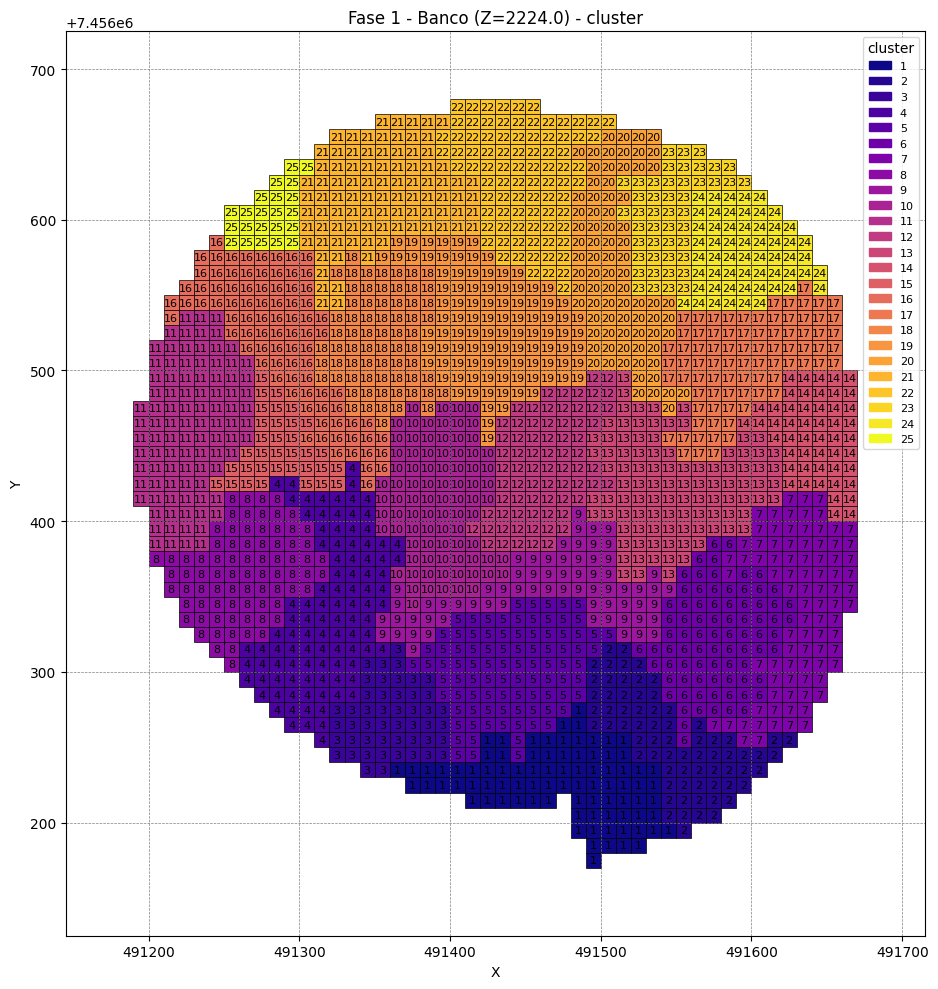

In [44]:
tbsh.plot_fase_banco(df_inf, 'cluster')

Tratando 'cluster' como Categórica (29 valores únicos).


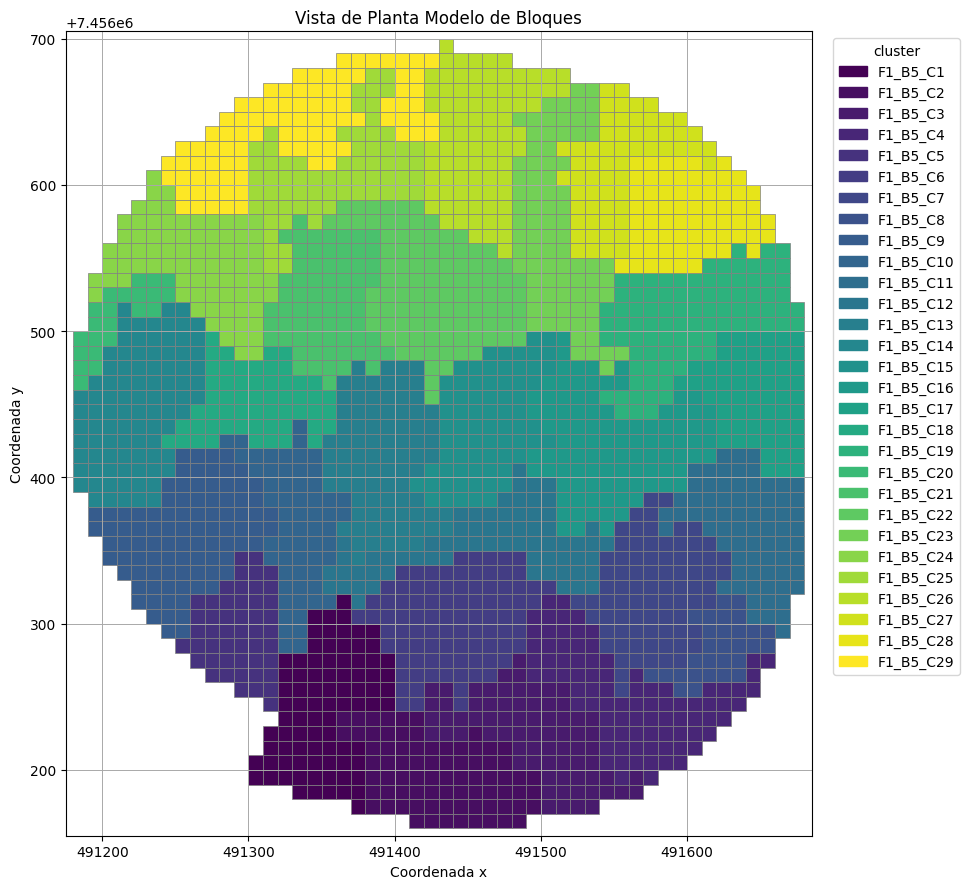

In [ ]:
df_mina_clustered = pd.read_csv("df_mina_clustered_4.csv")
df = df_mina_clustered.copy()
f,b = 1,5
df = df[(df['fase']==f)&(df['banco']==b)]
df.reset_index(inplace=True, drop=True)
df.rename(columns={'final_cluster_label': 'cluster'}, inplace=True)
aux.plot_mine_blocks_adv(df, 'cluster')


In [10]:
A = tbsh.Calculate_Adjency_Matrix(df, 10)
df2 = tbsh.Shape_Refinement_Tabesh(df, A, Min_Cluster_Length=20, Iterations_PostProcessing= 50)

========PostProcessing Results========
Total de clusters: 29
Tiempo: 63.86706614494324


In [6]:
df2[0]

x          y       z        au       cpy      cueq       cus  \
0     491375.0  7456175.0  2240.0  0.026555  0.050147  0.017366  0.001928   
1     491385.0  7456175.0  2240.0  0.024233  0.125937  0.043612  0.012661   
2     491395.0  7456175.0  2240.0  0.024233  0.125937  0.043612  0.012661   
3     491415.0  7456165.0  2240.0  0.010305  0.130463  0.045179  0.014165   
4     491425.0  7456165.0  2240.0  0.010097  0.149698  0.051840  0.013722   
...        ...        ...     ...       ...       ...       ...       ...   
2132  491525.0  7456665.0  2240.0  0.077704  0.382872  0.132589  0.083393   
2133  491535.0  7456665.0  2240.0  0.077704  0.382872  0.132589  0.083393   
2134  491545.0  7456665.0  2240.0  0.079933  0.367093  0.127124  0.073981   
2135  491555.0  7456665.0  2240.0  0.079933  0.367093  0.127124  0.073981   
2136  491435.0  7456695.0  2240.0  0.050178  0.362285  0.125459  0.064180   

           cut   density  material   py  recg_au  recg_cu     tasox  \
0     0.017366  2.472998         0  0.0      0.0      0.0  0.111023   
1     0.043612  2.470923         0  0.0      0.0      0.0  0.290298   
2     0.043612  2.470923         0  0.0      0.0      0.0  0.290298   
3     0.045179  2.485071         0  0.0      0.0      0.0  0.313523   
4     0.051840  2.512373         0  0.0      0.0      0.0  0.264695   
...        ...       ...       ...  ...      ...      ...       ...   
2132  0.132589  2.604985         1  0.0      0.0      0.0  0.628958   
2133  0.132589  2.604985         1  0.0      0.0      0.0  0.628958   
2134  0.127124  2.613966         1  0.0      0.0      0.0  0.581956   
2135  0.127124  2.613966         1  0.0      0.0      0.0  0.581956   
2136  0.125459  2.588062         1  0.0      0.0      0.0  0.511557   

      tipomineral  fase     id  banco  final_cluster_id    cluster  
0               0     1  55385      5                 1   F1_B5_C1  
1               0     1  55386      5                 2   F1_B5_C2  
2               0     1  55387      5                 2   F1_B5_C2  
3               0     1  55410      5                 2   F1_B5_C2  
4               0     1  55411      5                 2   F1_B5_C2  
...           ...   ...    ...    ...               ...        ...  
2132            1     1  69001      5                23  F1_B5_C23  
2133            1     1  69002      5                23  F1_B5_C23  
2134            1     1  69003      5                27  F1_B5_C27  
2135            1     1  69028      5                27  F1_B5_C27  
2136            1     1  69547      5                26  F1_B5_C26  

[2137 rows x 20 columns]

Tratando 'cluster' como Categórica (29 valores únicos).


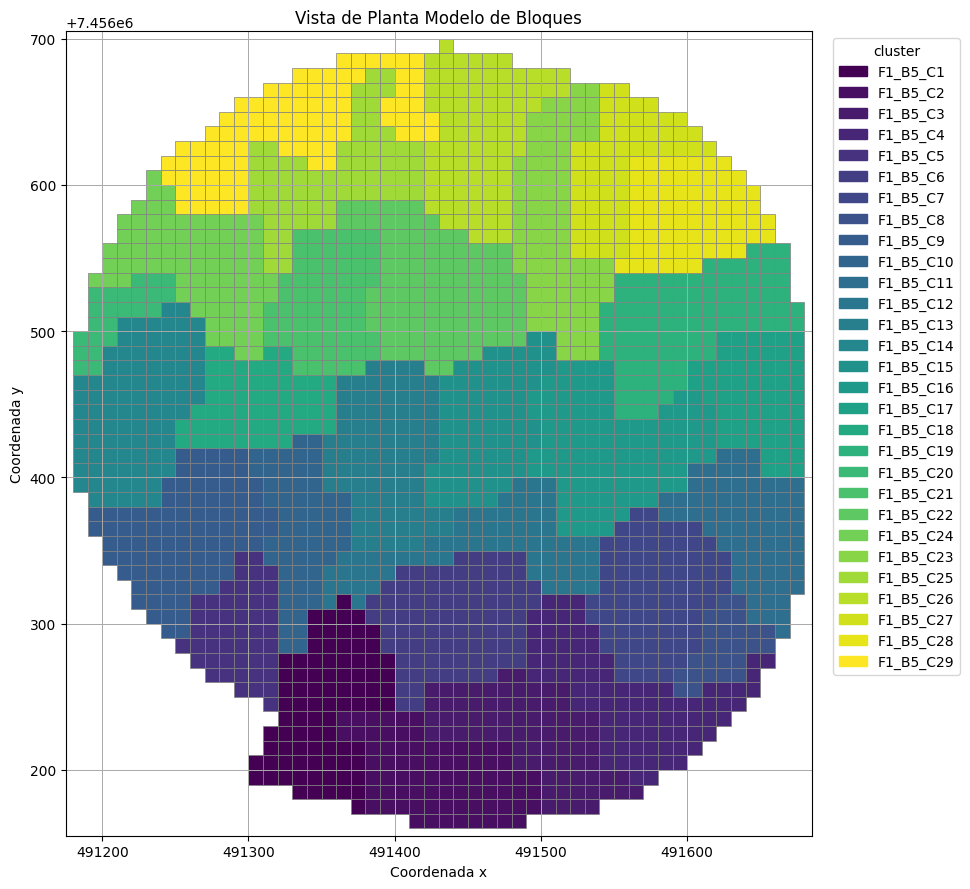

In [11]:
aux.plot_mine_blocks_adv(df2[0], 'cluster')

In [4]:
df_copy = df_mina_clustered.copy()

In [5]:
df_copy['final_cluster_label']

0        F4_B22_C1
1        F4_B22_C1
2        F4_B22_C1
3        F4_B22_C1
4        F4_B22_C1
           ...    
91277     F3_B2_C6
91278     F3_B2_C6
91279     F3_B2_C6
91280     F3_B2_C6
91281     F3_B2_C6
Name: final_cluster_label, Length: 91282, dtype: object

Las siguientes celdas hacen graficos por banco de la fase 1 para comparar los clusters

In [ ]:
f = 1
fase_data = df_copy[df_copy['fase'] == f]
x_min_global = fase_data['x'].min() - 5*10
x_max_global = fase_data['x'].max() + 5*10
y_min_global = fase_data['y'].min() - 5*10
y_max_global = fase_data['y'].max() + 5*10

for b in range(1, 10):
    df_ = df_copy[(df_copy['fase'] == f) & (df_copy['banco'] == b)]
    tbsh.plot_fase_banco(df_, column_hue='final_cluster_id',
                         xlim=(x_min_global, x_max_global),
                         ylim=(y_min_global, y_max_global))

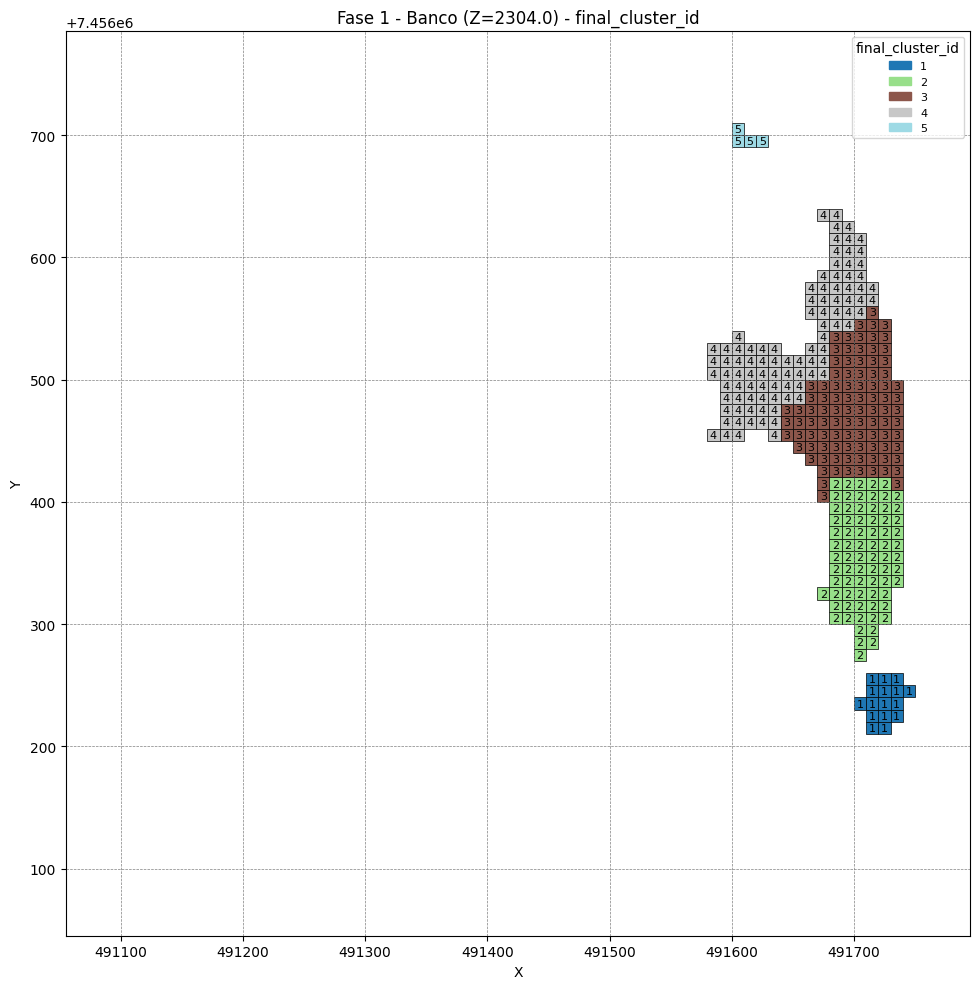

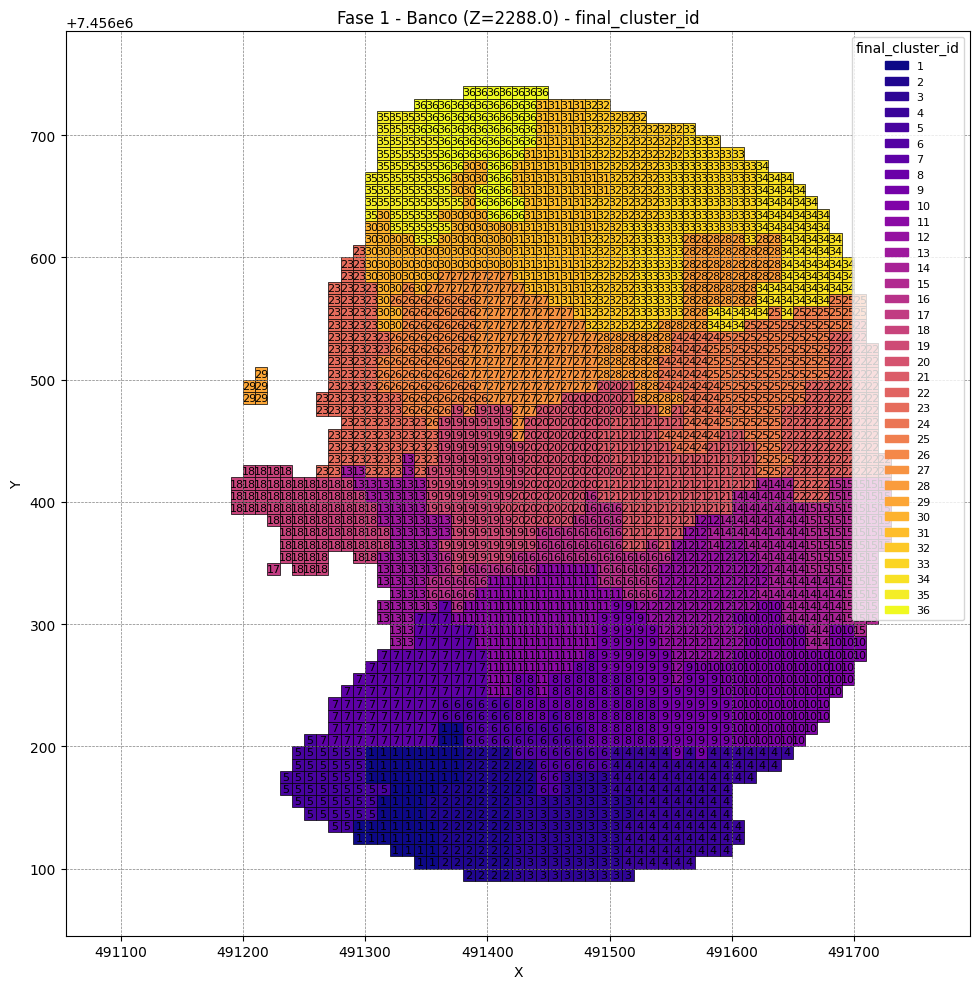

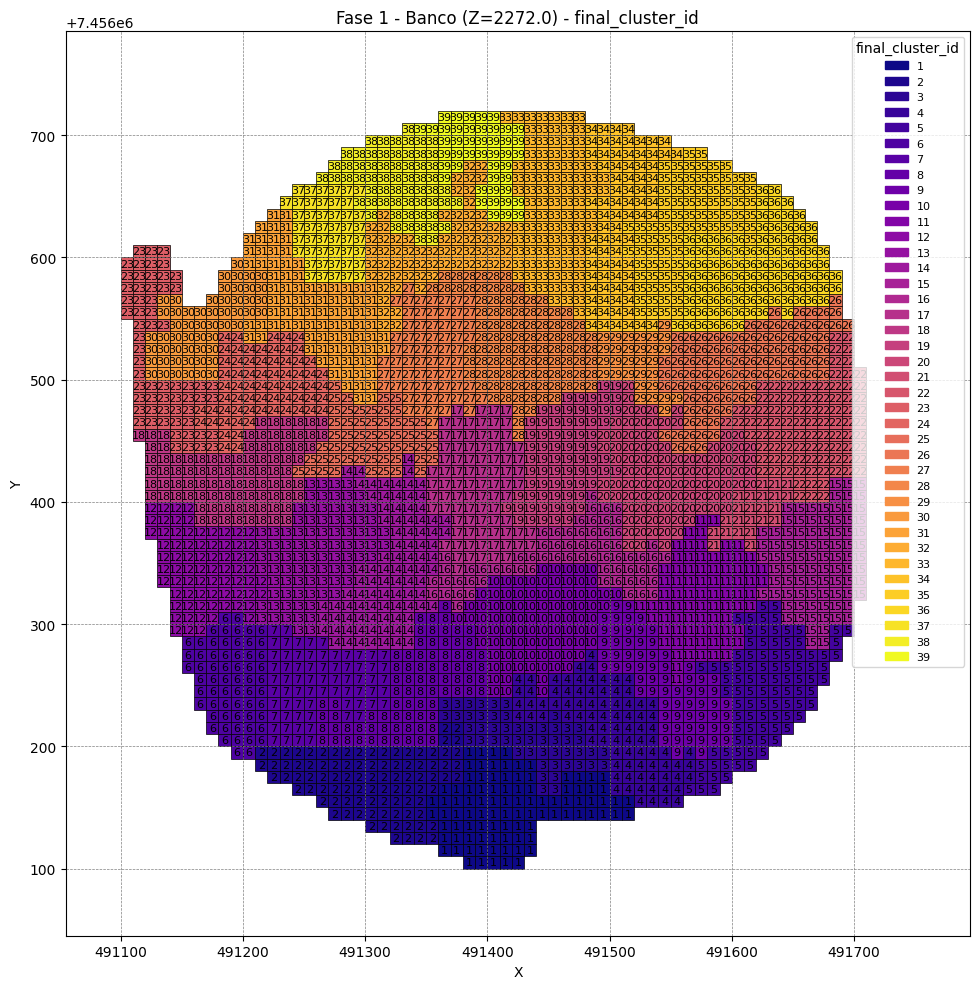

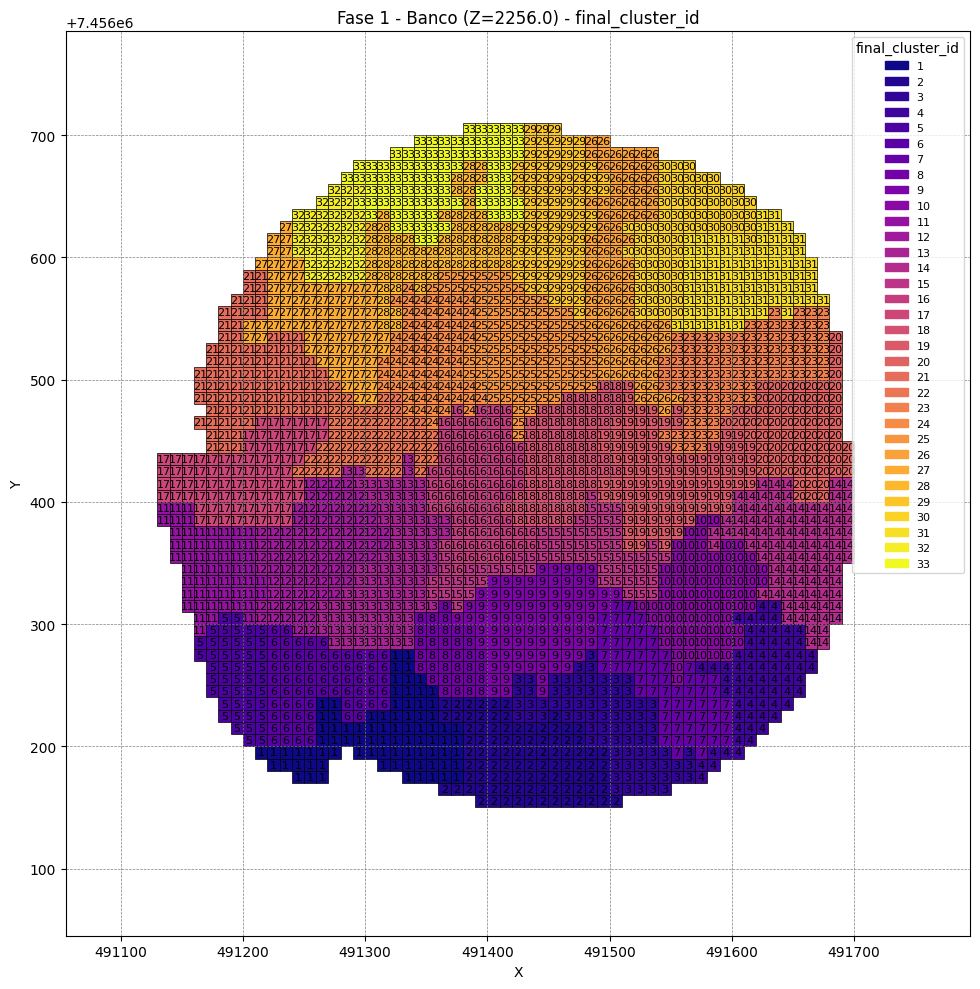

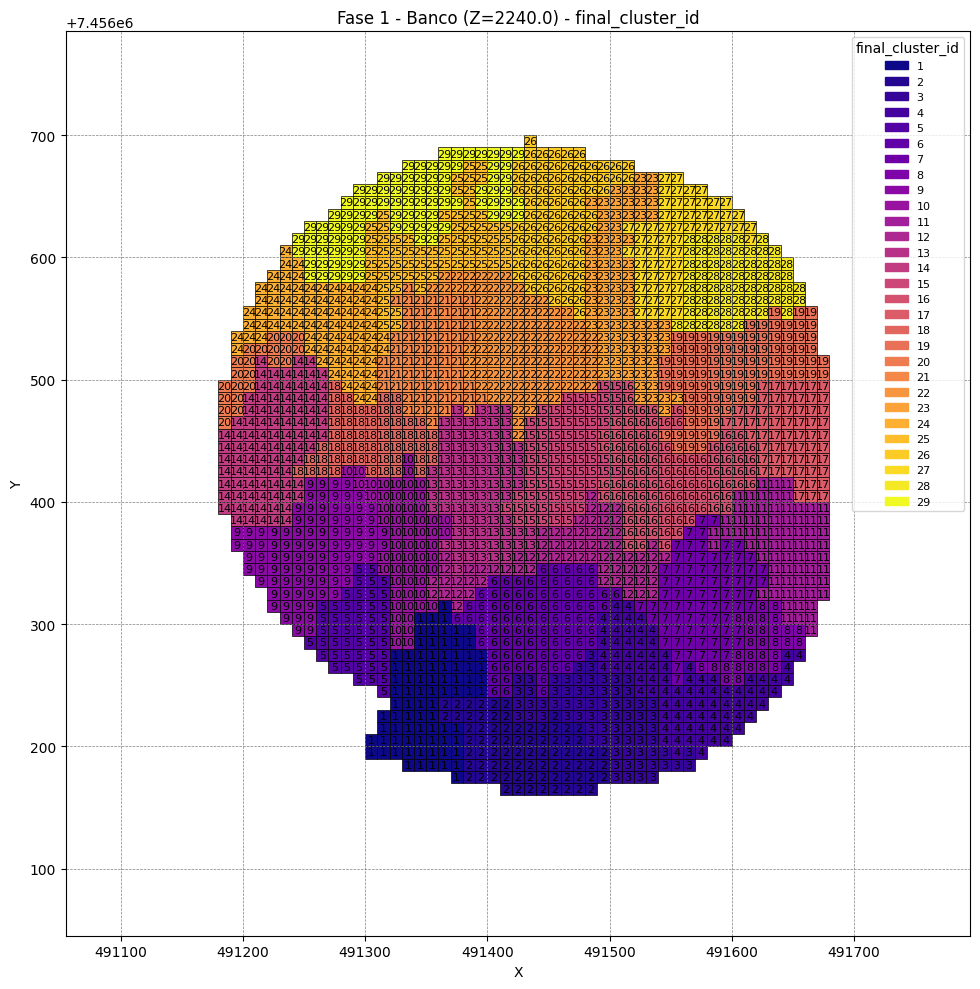

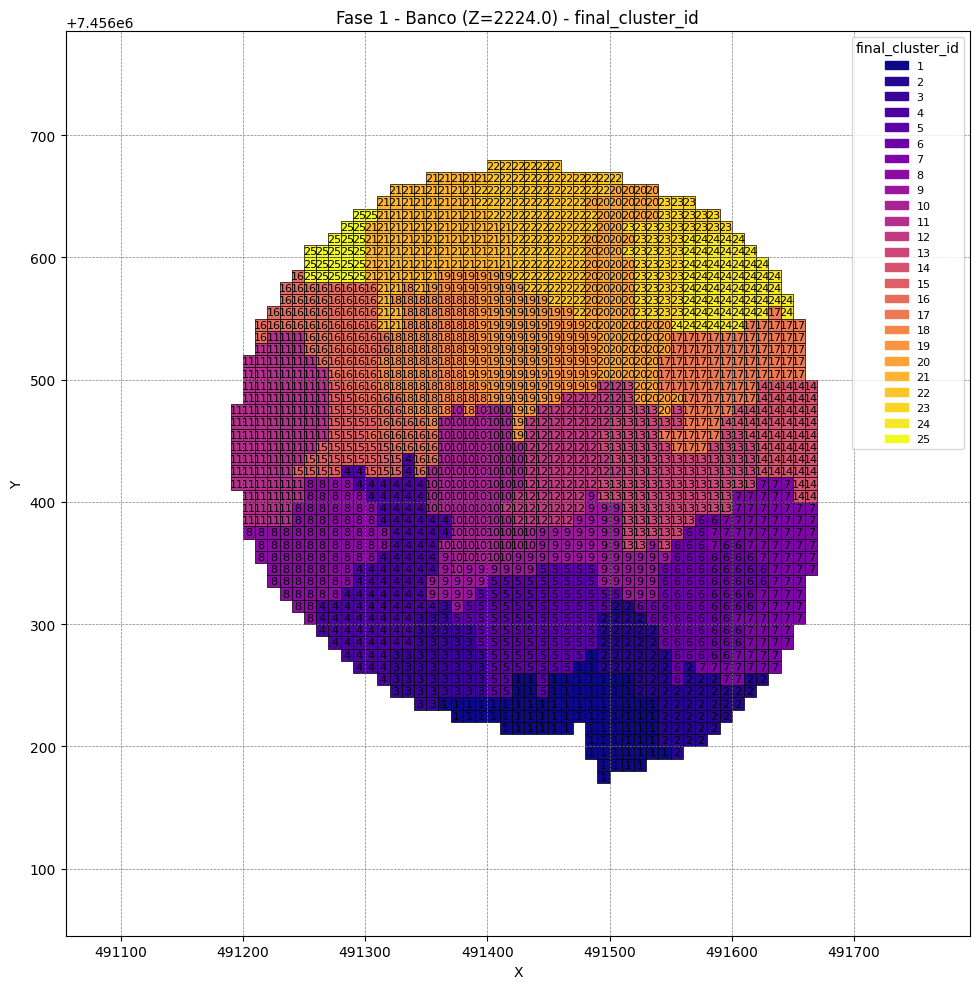

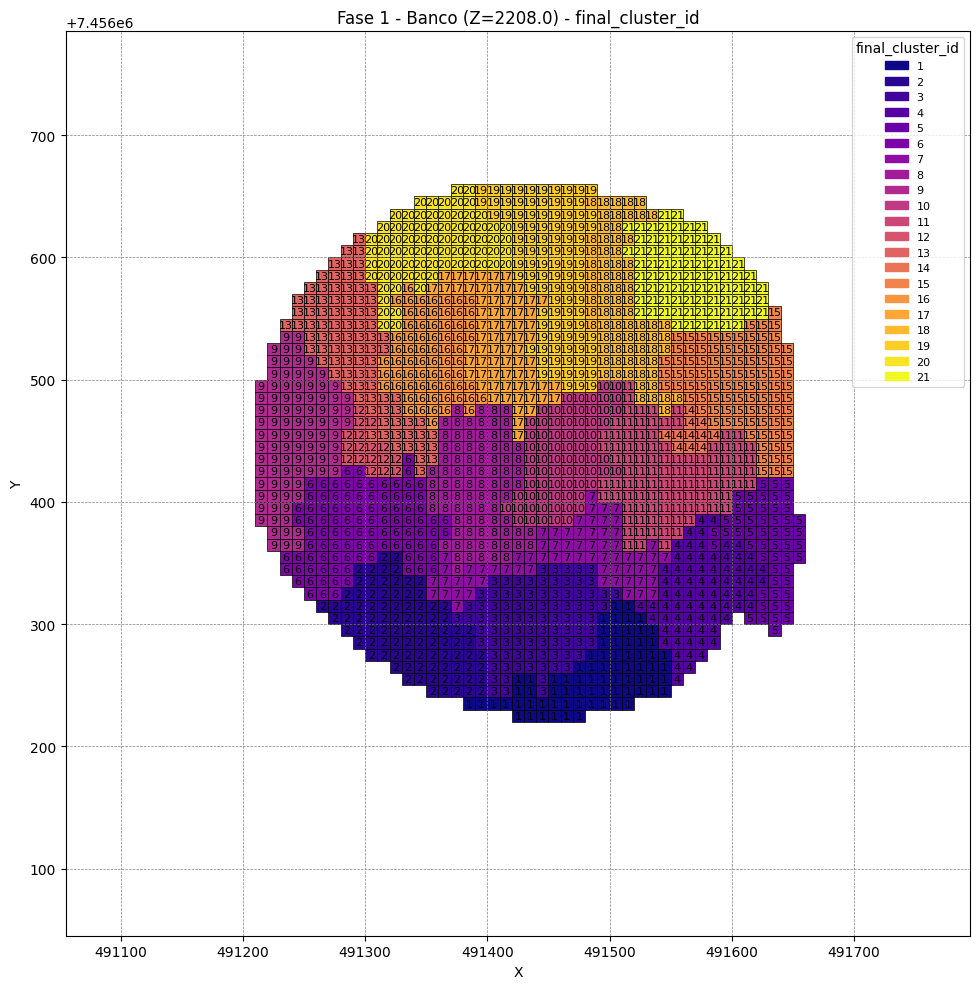

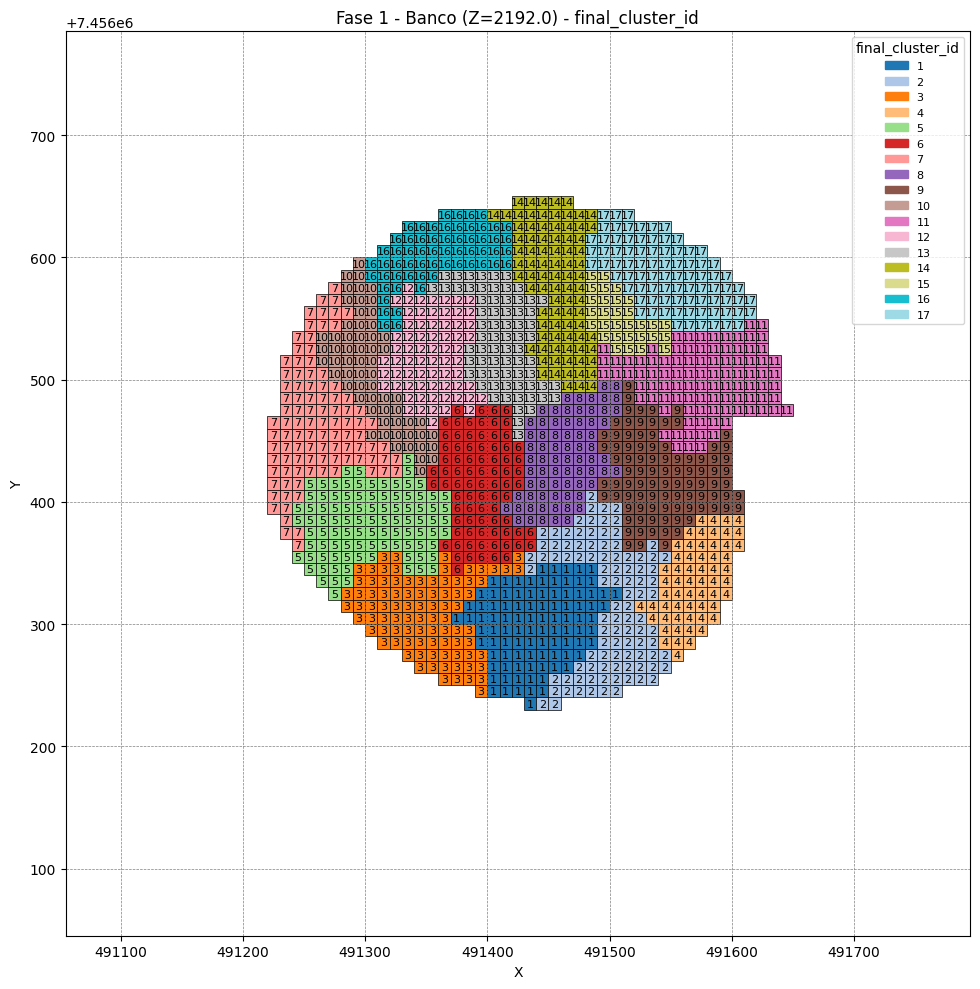

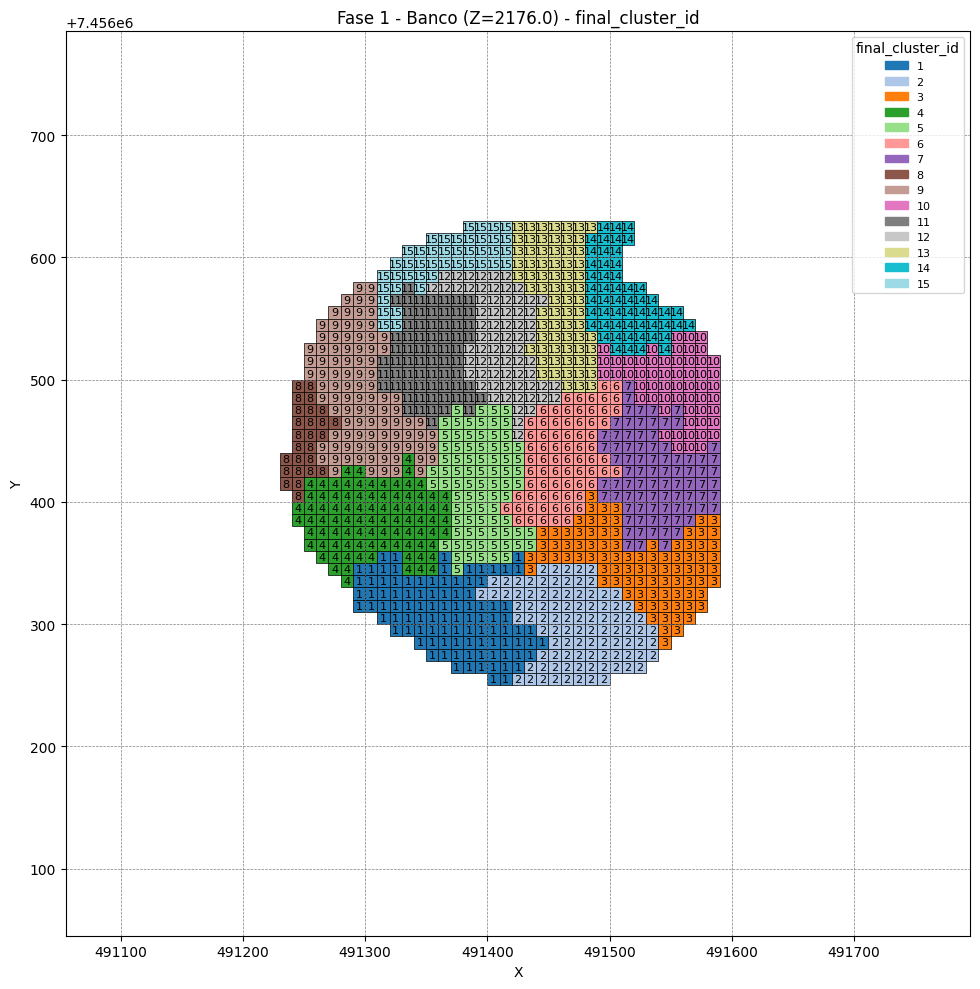

In [9]:
for b in range(1, 10):
    df_ = df_copy[(df_copy['fase'] == f) & (df_copy['banco'] == b)]
    tbsh.plot_fase_banco(df_, column_hue='final_cluster_id',
                         xlim=(x_min_global, x_max_global),
                         ylim=(y_min_global, y_max_global))

In [59]:
df

x          y       z        au       cpy      cueq       cus  \
0      491425.0  7456205.0  1968.0  0.288929  1.124707  0.712658  0.022003   
1      491435.0  7456195.0  1968.0  0.266522  1.057851  0.640223  0.021141   
2      491445.0  7456195.0  1968.0  0.243283  2.427782  0.531022  0.019991   
3      491455.0  7456195.0  1968.0  0.243283  2.427782  0.531022  0.019991   
4      491435.0  7456205.0  1968.0  0.288929  1.124707  0.712658  0.022003   
...         ...        ...     ...       ...       ...       ...       ...   
91277  491985.0  7456545.0  2320.0  0.010000  0.043324  0.015000  0.001000   
91278  491975.0  7456555.0  2320.0  0.010000  0.043324  0.015000  0.001000   
91279  491985.0  7456555.0  2320.0  0.010000  0.043324  0.015000  0.001000   
91280  491975.0  7456565.0  2320.0  0.017194  0.112734  0.039031  0.006303   
91281  491975.0  7456575.0  2320.0  0.017194  0.112734  0.039031  0.006303   

            cut   density  material        py    recg_au    recg_cu     tasox  \
0      0.550661  2.615598         8  0.401511  69.001505  87.011938  0.039957   
1      0.491924  2.626056         8  0.197908  68.839492  87.471598  0.042976   
2      0.396348  2.637350         6  0.399009  68.633711  87.659524  0.050438   
3      0.396348  2.637350         6  0.399009  68.633711  87.659524  0.050438   
4      0.550661  2.615598         8  0.401511  69.001505  87.011938  0.039957   
...         ...       ...       ...       ...        ...        ...       ...   
91277  0.015000  2.352000         0  0.000000   0.000000   0.000000  0.066667   
91278  0.015000  2.352000         0  0.000000   0.000000   0.000000  0.066667   
91279  0.015000  2.352000         0  0.000000   0.000000   0.000000  0.066667   
91280  0.039031  2.352000         0  0.000000   0.000000   0.000000  0.161474   
91281  0.039031  2.352000         0  0.000000   0.000000   0.000000  0.161474   

       tipomineral  fase     id  banco  cluster global_cluster  
0                2     4      1     22      1.0    F4_B22_C1.0  
1                2     4      2     22      1.0    F4_B22_C1.0  
2                2     4      3     22      1.0    F4_B22_C1.0  
3                2     4      4     22      1.0    F4_B22_C1.0  
4                2     4      5     22      1.0    F4_B22_C1.0  
...            ...   ...    ...    ...      ...            ...  
91277            0     3  91278      2     17.0    F3_B2_C17.0  
91278            0     3  91279      2     17.0    F3_B2_C17.0  
91279            0     3  91280      2     17.0    F3_B2_C17.0  
91280            0     3  91281      2     17.0    F3_B2_C17.0  
91281            0     3  91282      2     17.0    F3_B2_C17.0  

[91282 rows x 20 columns]

In [3]:
df = pd.read_csv("df_mina_clustered_w_shape_refinement.csv")

Tratando 'cluster' como Continua.
  Escala de color: min=1.00, max=730.00
Tratando 'cluster' como Continua.
  Escala de color: min=1.00, max=43.00


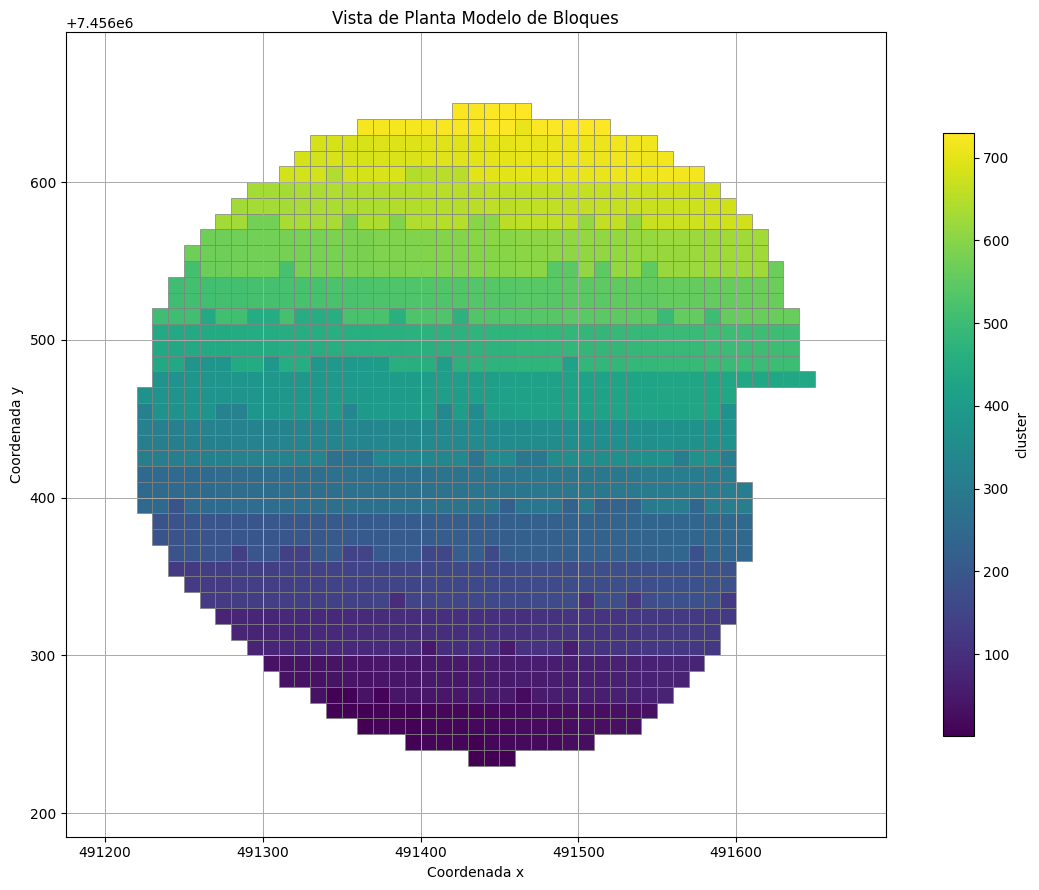

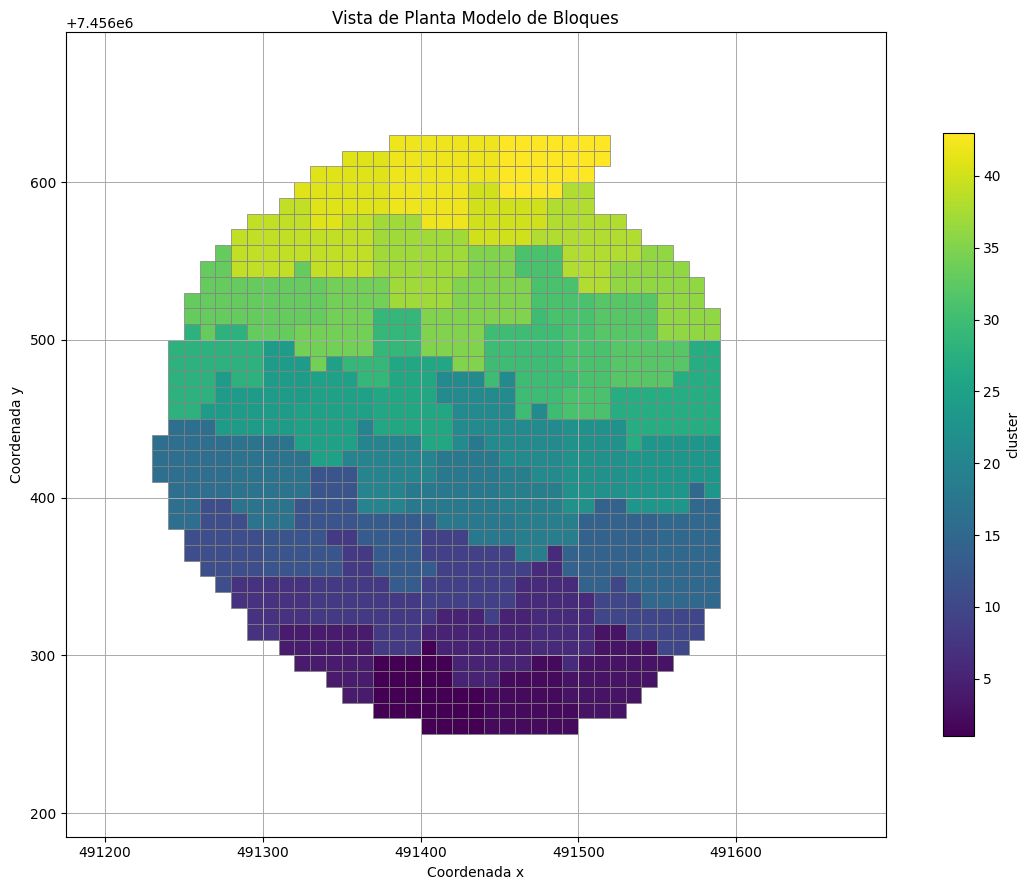

In [57]:
fase_data = df
x_min_global = fase_data['x'].min() - 5*10
x_max_global = fase_data['x'].max() + 5*10
y_min_global = fase_data['y'].min() - 5*10
y_max_global = fase_data['y'].max() + 5*10

for b in df['banco'].unique():
    df_ = df[(df['fase'] == f) & (df['banco'] == b)]
    aux.plot_mine_blocks_adv(df_, color_by_col='cluster', xlim=(x_min_global, x_max_global),
                         ylim=(y_min_global, y_max_global), save=True, save_name=f'fase{f}banco{b}.png')


In [6]:
CV = aux.Coefficient_Variation(df)
CV[0]

np.float64(0.6436316107490445)

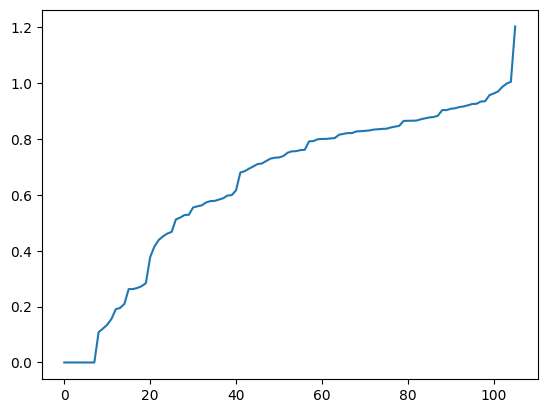

In [7]:
import matplotlib.pyplot as plt
plt.plot(np.sort(CV[1]))